In [1]:
import sys
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.terms import num_comparison, nat_numbers, arithm_ops, combinators, pairs, logic
from calculus_path_mod.terms.pseudonym import *

from calculus_path_mod.json_serialization import load_terms
from fitter import Fitter, get_common_distributions
from calculus_utils.drawing import draw_steps_displot

# Load Terms filtered LO

In [2]:
terms_LO = load_terms("../tests_11_retests/terms_210_filtered_LO.dat")
# terms_RI = load_terms("../tests_11_retests/terms_210_filtered_RI.dat")

# Collect normalization process data for LO-strategy & LI-strategy with tLO

In [3]:
def gen_norm_data(terms_list, strategy):
    steps = []
    for term in tqdm(terms_list):
        try:
            norm_data = term.normalize_with_params(strategy)
            steps.append(norm_data)
        except Exception:
            steps.append(None)
    return steps

In [4]:
data_LO = gen_norm_data(terms_LO, LOStrategy())
data_LI = gen_norm_data(terms_LO, LIStrategy())

100%|██████████| 226/226 [11:36<00:00,  3.08s/it] 


# Visualize distribution with Ridge Plot

In [47]:
data_vis_LO = {"step": [], "step_count": [],
               "count_terms": [], "vertices": [], "redexes": [], "redex_depths": [],
               "redex_indexes": [], "heights": [], "widths": [], "steps_time": []}

params_lst = ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths", "steps_time"]
steps_lst = list(range(max([len(record["vertices"]) for record in data_LO])))

for step_no in steps_lst:
    count_terms = 0
    for term_params in data_LO:
        if term_params and step_no < len(term_params["vertices"]):
            count_terms += 1

    for term_params in data_LO:
        if term_params and step_no < len(term_params["vertices"]):
            for key_ in params_lst:
                data_vis_LO[key_].append(term_params[key_][step_no])
            data_vis_LO["step"].append(step_no)
            data_vis_LO["count_terms"].append(count_terms)
            data_vis_LO["step_count"].append(f"{step_no}) -> [{count_terms}]")

In [48]:
data_vis_LI = {"step": [], "step_count": [],
               "count_terms": [], "vertices": [], "redexes": [], "redex_depths": [],
               "redex_indexes": [], "heights": [], "widths": [], "steps_time": []}

params_lst = ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths", "steps_time"]
steps_lst = list(range(max([len(record["vertices"]) for record in data_LI if record])))

for step_no in steps_lst:
    count_terms = 0
    for term_params in data_LI:
        if term_params and step_no < len(term_params["vertices"]):
            count_terms += 1

    for term_params in data_LI:
        if term_params and step_no < len(term_params["vertices"]):
            for key_ in params_lst:
                data_vis_LI[key_].append(term_params[key_][step_no])
            data_vis_LI["step"].append(step_no)
            data_vis_LI["count_terms"].append(count_terms)
            data_vis_LI["step_count"].append(f"{step_no}) -> [{count_terms}]")

In [49]:
data_vis_LO = pd.DataFrame(data_vis_LO)
data_vis_LI = pd.DataFrame(data_vis_LI)

# "vertices"
# "redexes"
# "redex_depths"
# "redex_indexes"
# "heights"
# "widths"
# "steps_time"

In [95]:
def draw_hist_ridge_plot(
        data_vis, data_decr="LO norm",
        fist_step_no=0, last_step_no=20,
        vis_data_name="vertices", vis_data_lim=100, range_step=1
):
    selected_data = [fist_step_no <= step_no < last_step_no for step_no in data_vis["step"]]
    tmp_data_vis = data_vis[selected_data].copy(deep=True)

    step_dict = dict()
    for key_ in range(fist_step_no, last_step_no):
        step_vis_data = tmp_data_vis[[step_no == key_ for step_no in tmp_data_vis["step"]]]
        step_vis_data = step_vis_data[vis_data_name].tolist()
        step_dict[f"step_no={key_}, total_terms={len(step_vis_data)}"] = step_vis_data

    fig, axs = plt.subplots(len(step_dict.keys()), figsize=(12, 1.7 * len(step_dict.keys()) + 1))
    for i, key_ in enumerate(step_dict.keys()):
        axs[i].hist(step_dict[key_], range(1, vis_data_lim, range_step), label=key_)
        axs[i].set_title(key_)

    print(f"{data_decr} for param: {vis_data_name}")
    fig.tight_layout()

# Visualize LO-strategy normalization steps params

LO norm for param: vertices


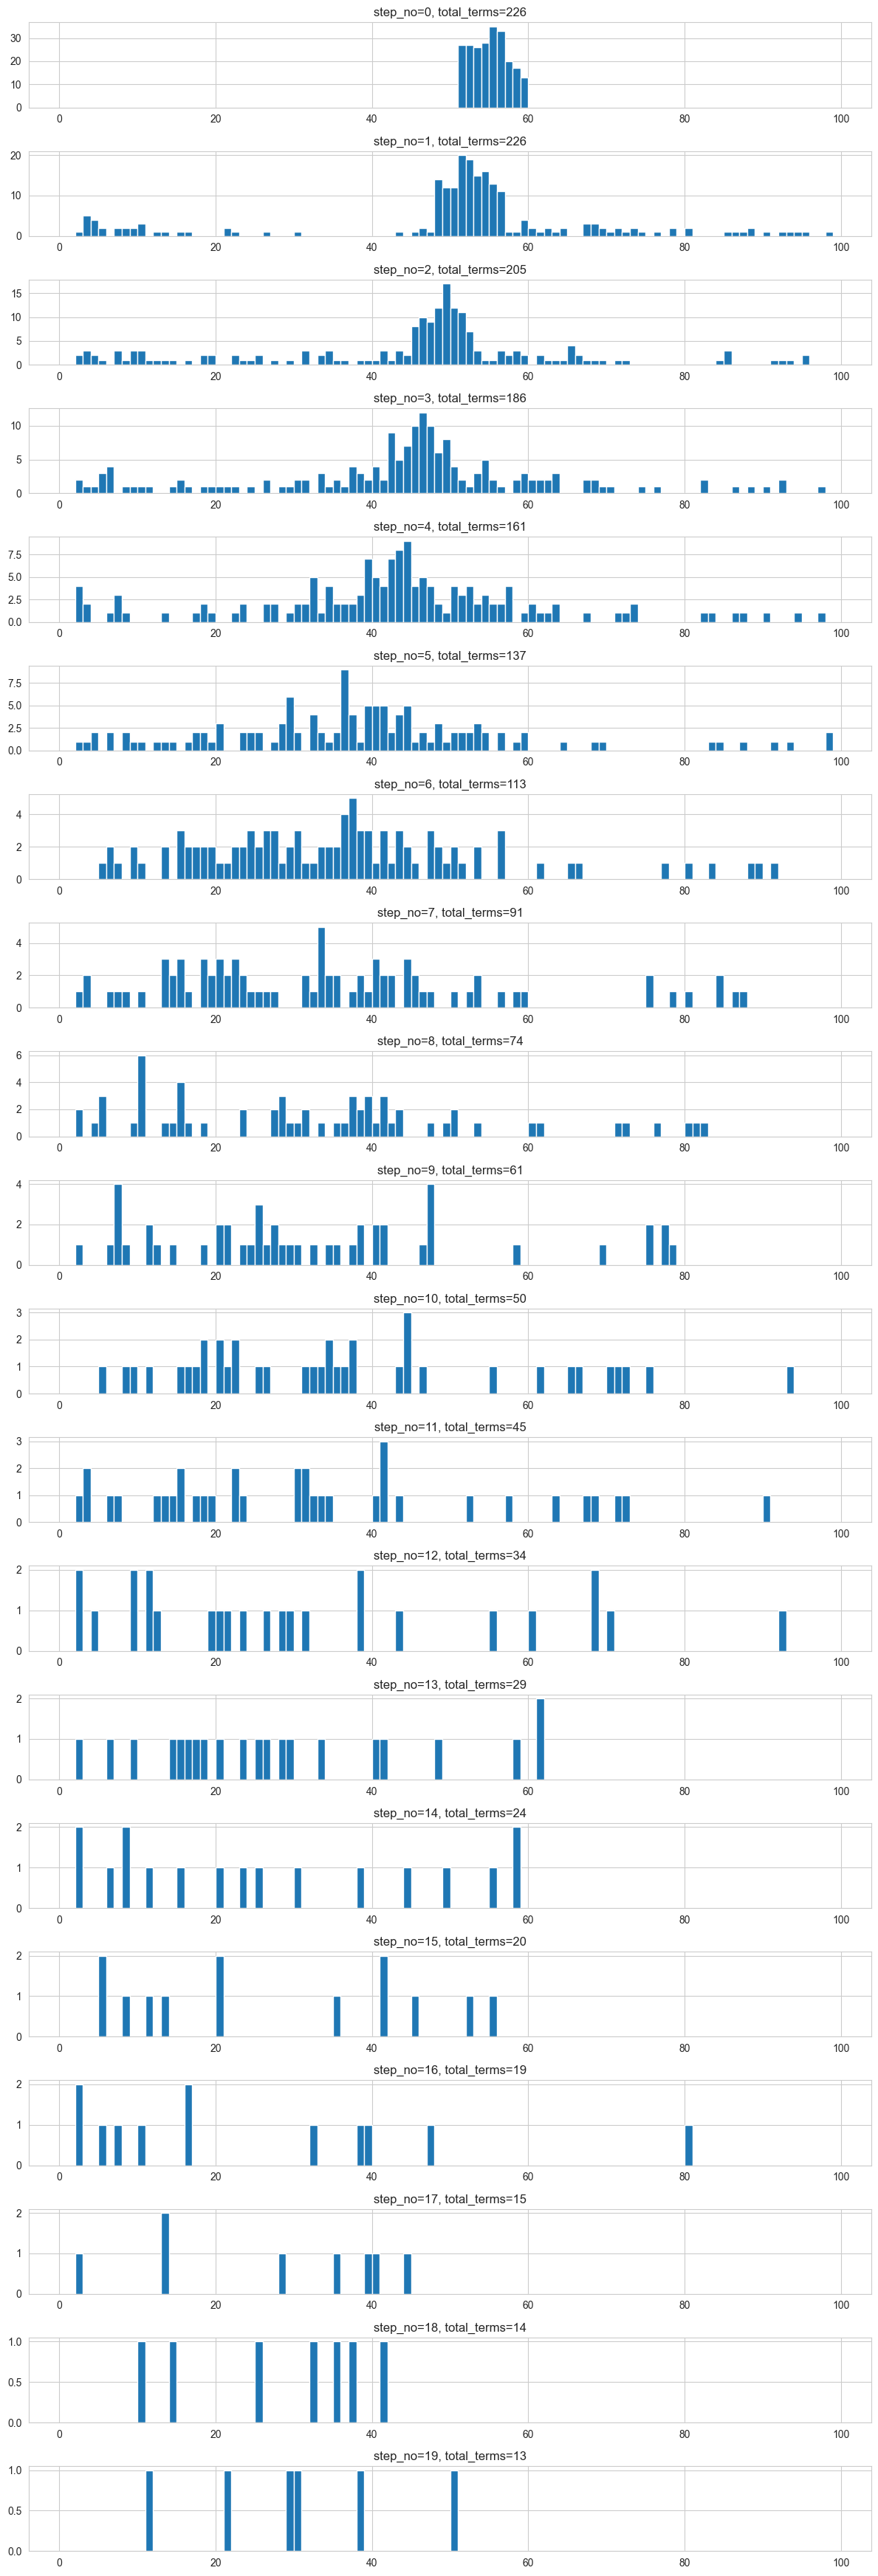

In [96]:
draw_hist_ridge_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="vertices", vis_data_lim=100,
)

LO norm for param: redexes


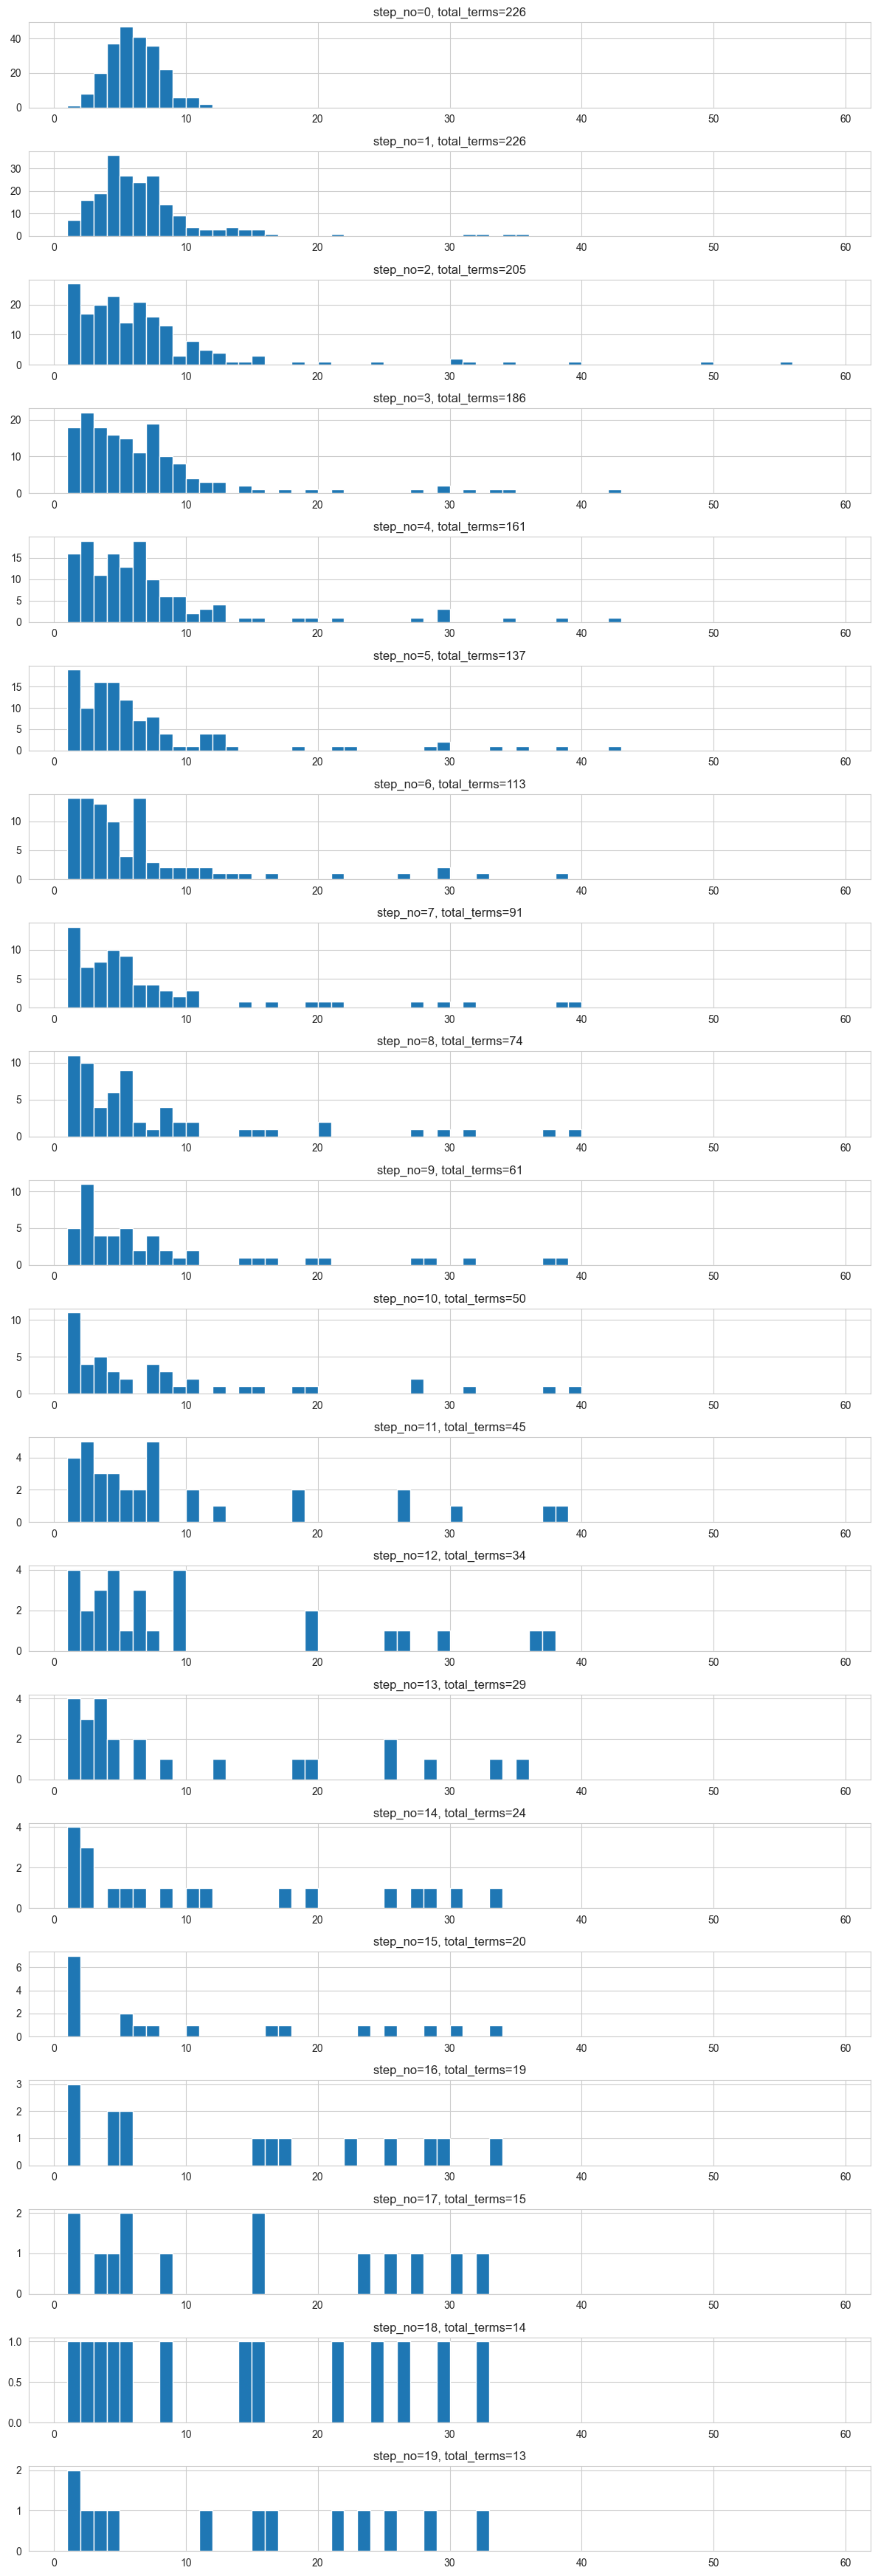

In [98]:
draw_hist_ridge_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="redexes", vis_data_lim=60,
)

LO norm for param: redex_depths


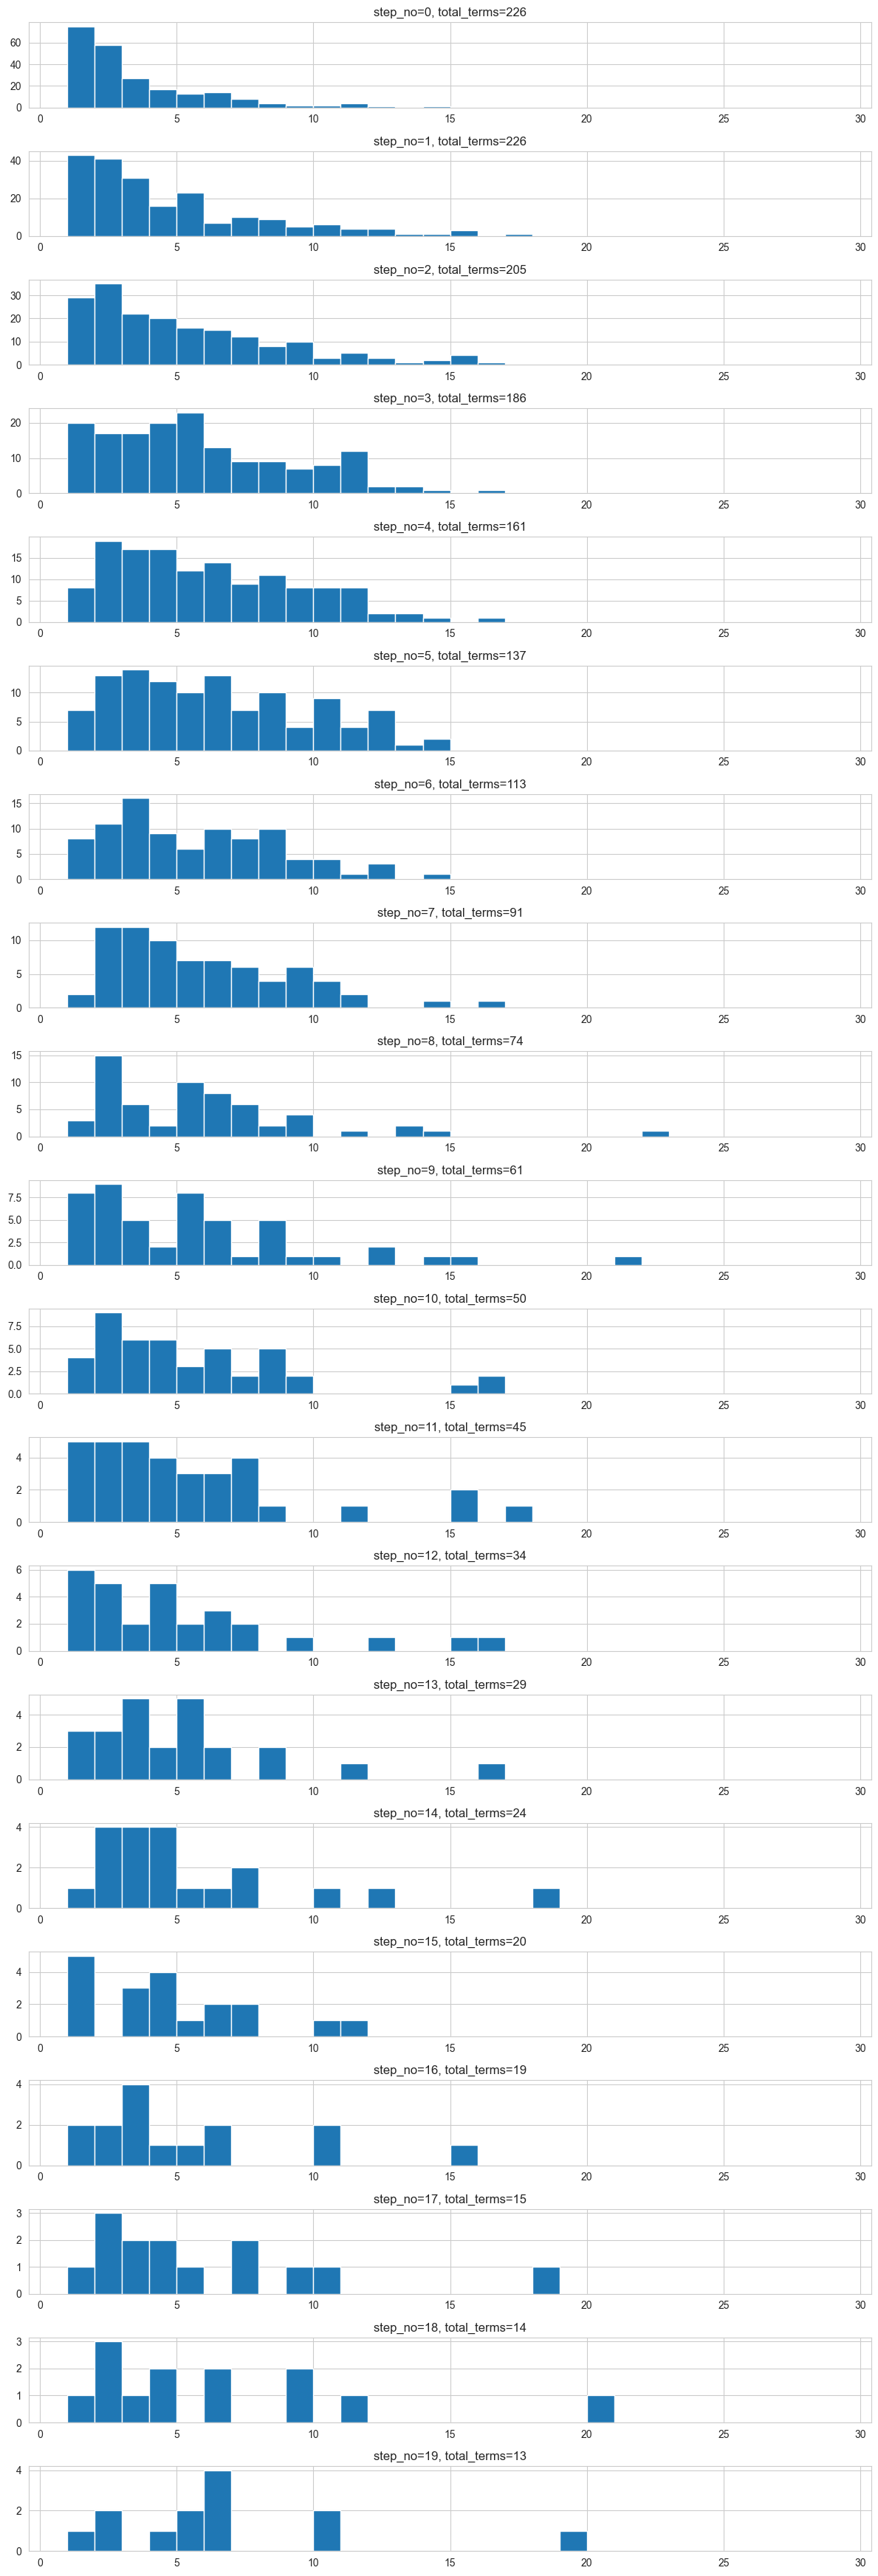

In [101]:
draw_hist_ridge_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="redex_depths", vis_data_lim=30,
)

LO norm for param: heights


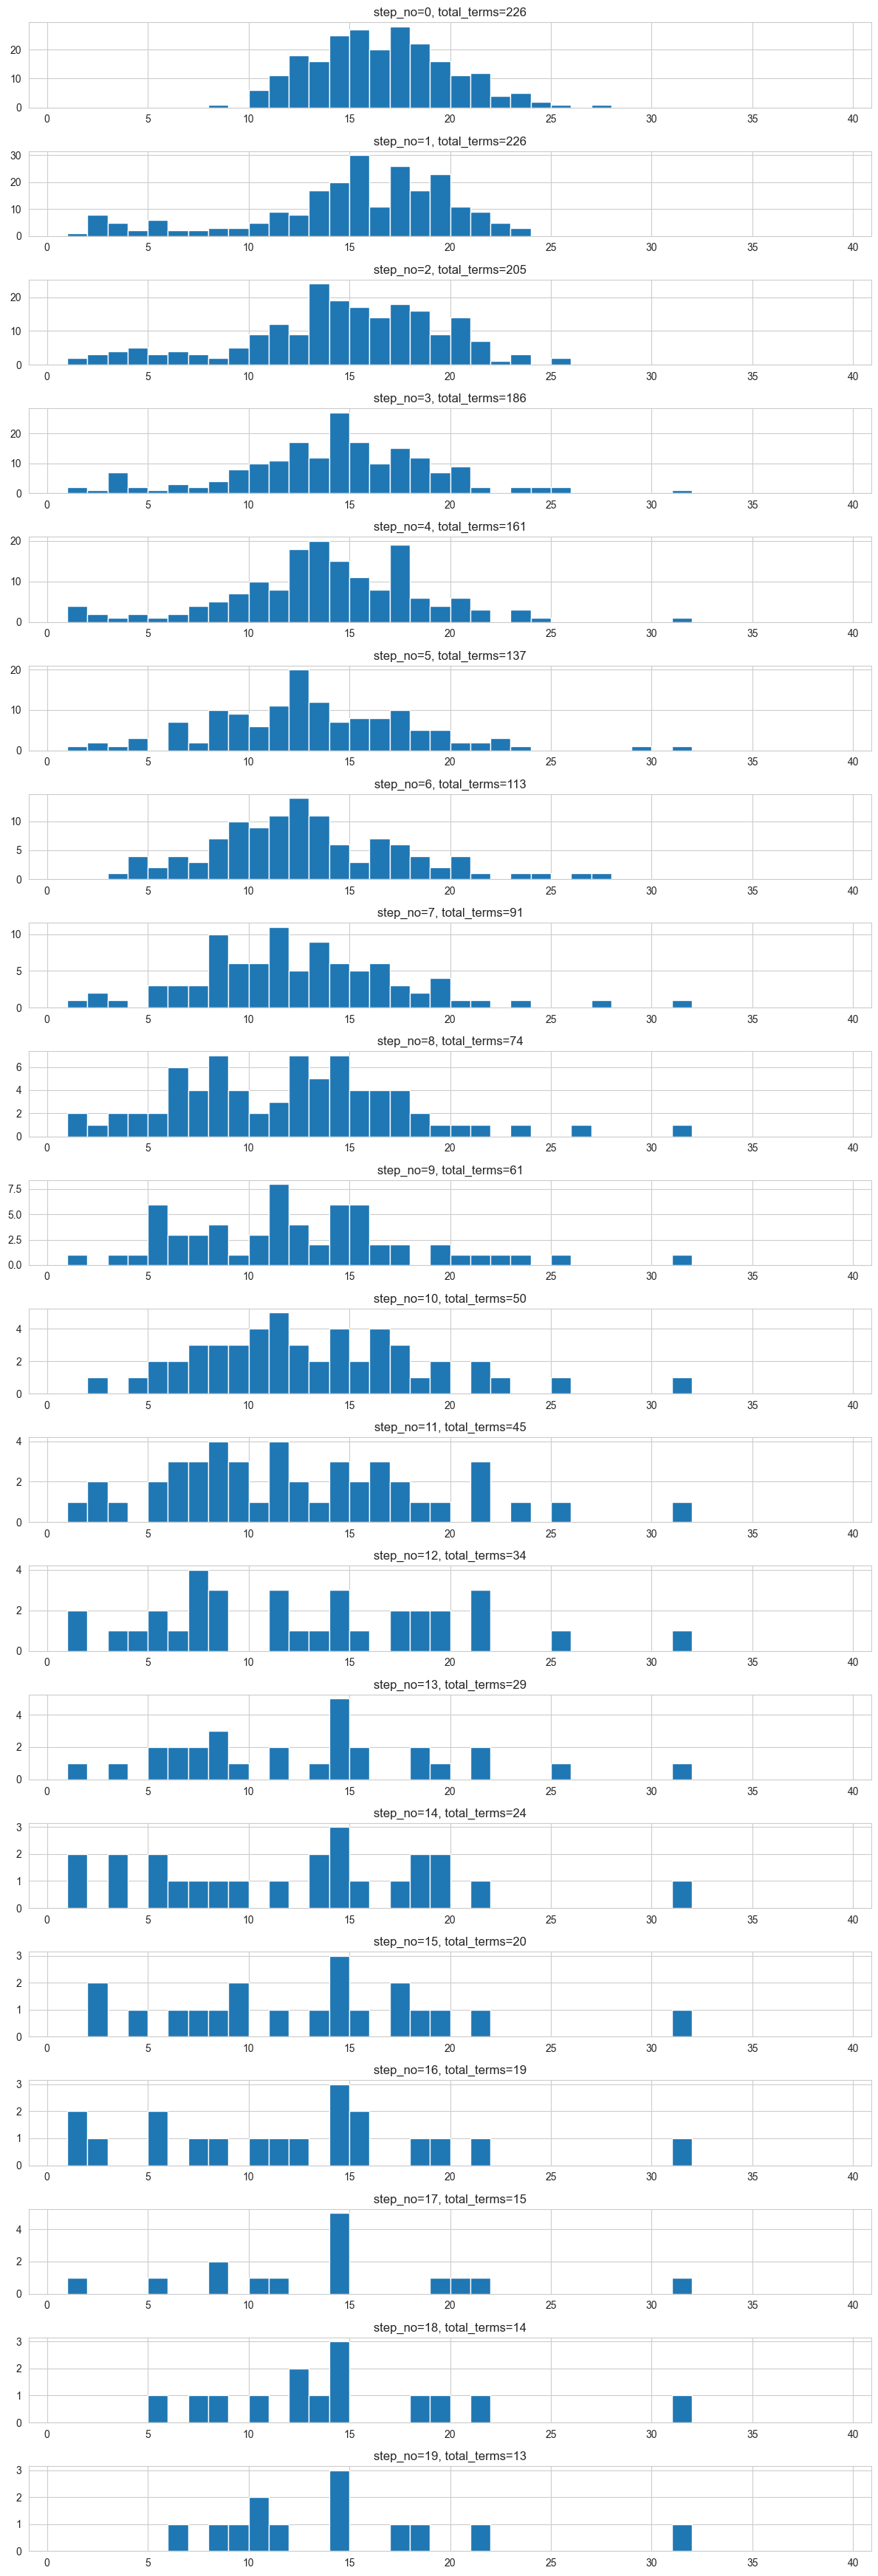

In [103]:
draw_hist_ridge_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="heights", vis_data_lim=40,
)

LO norm for param: widths


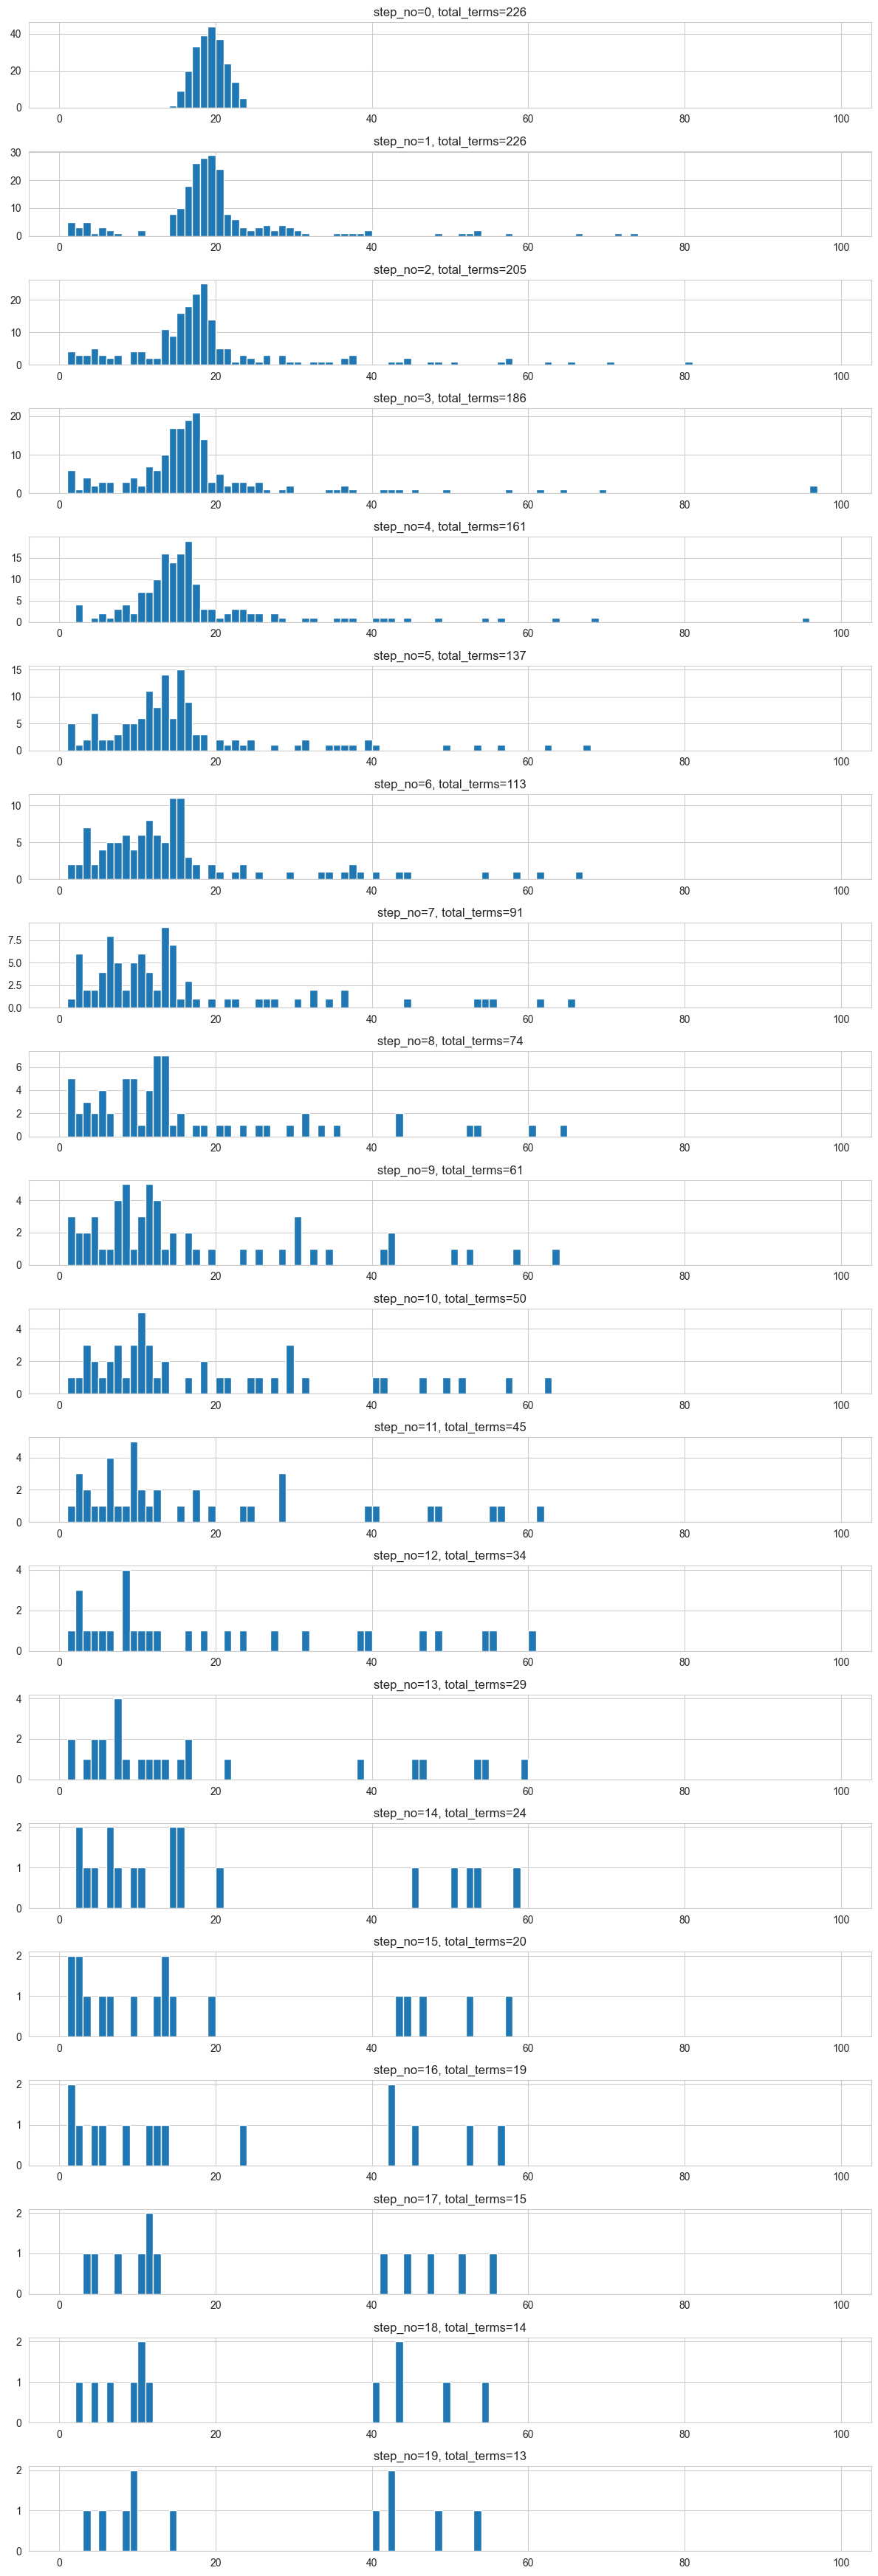

In [104]:
draw_hist_ridge_plot(
    data_vis=data_vis_LO, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="widths", vis_data_lim=100,
)

# Visualize LI-strategy normalization steps params

LO norm for param: vertices


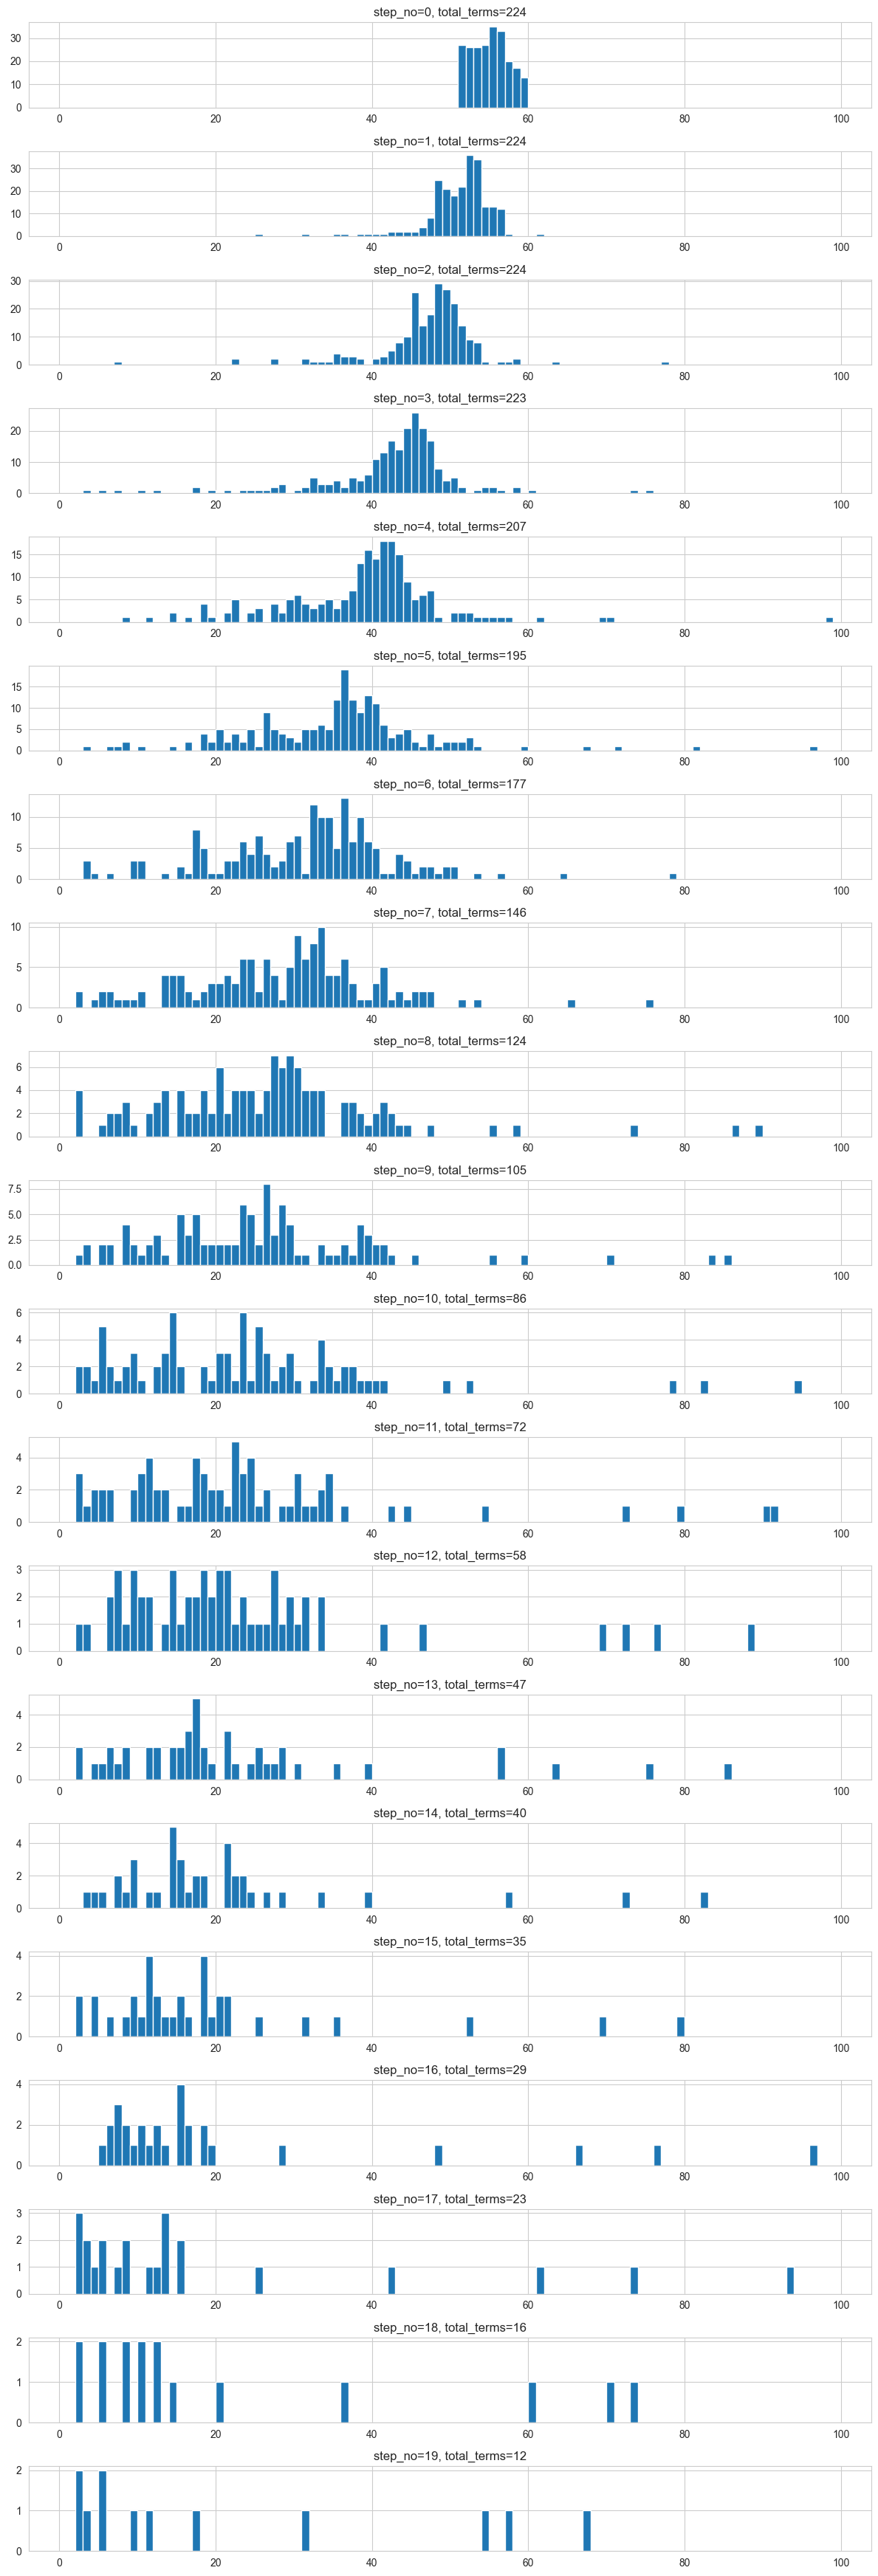

In [105]:
draw_hist_ridge_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="vertices", vis_data_lim=100,
)

LO norm for param: redexes


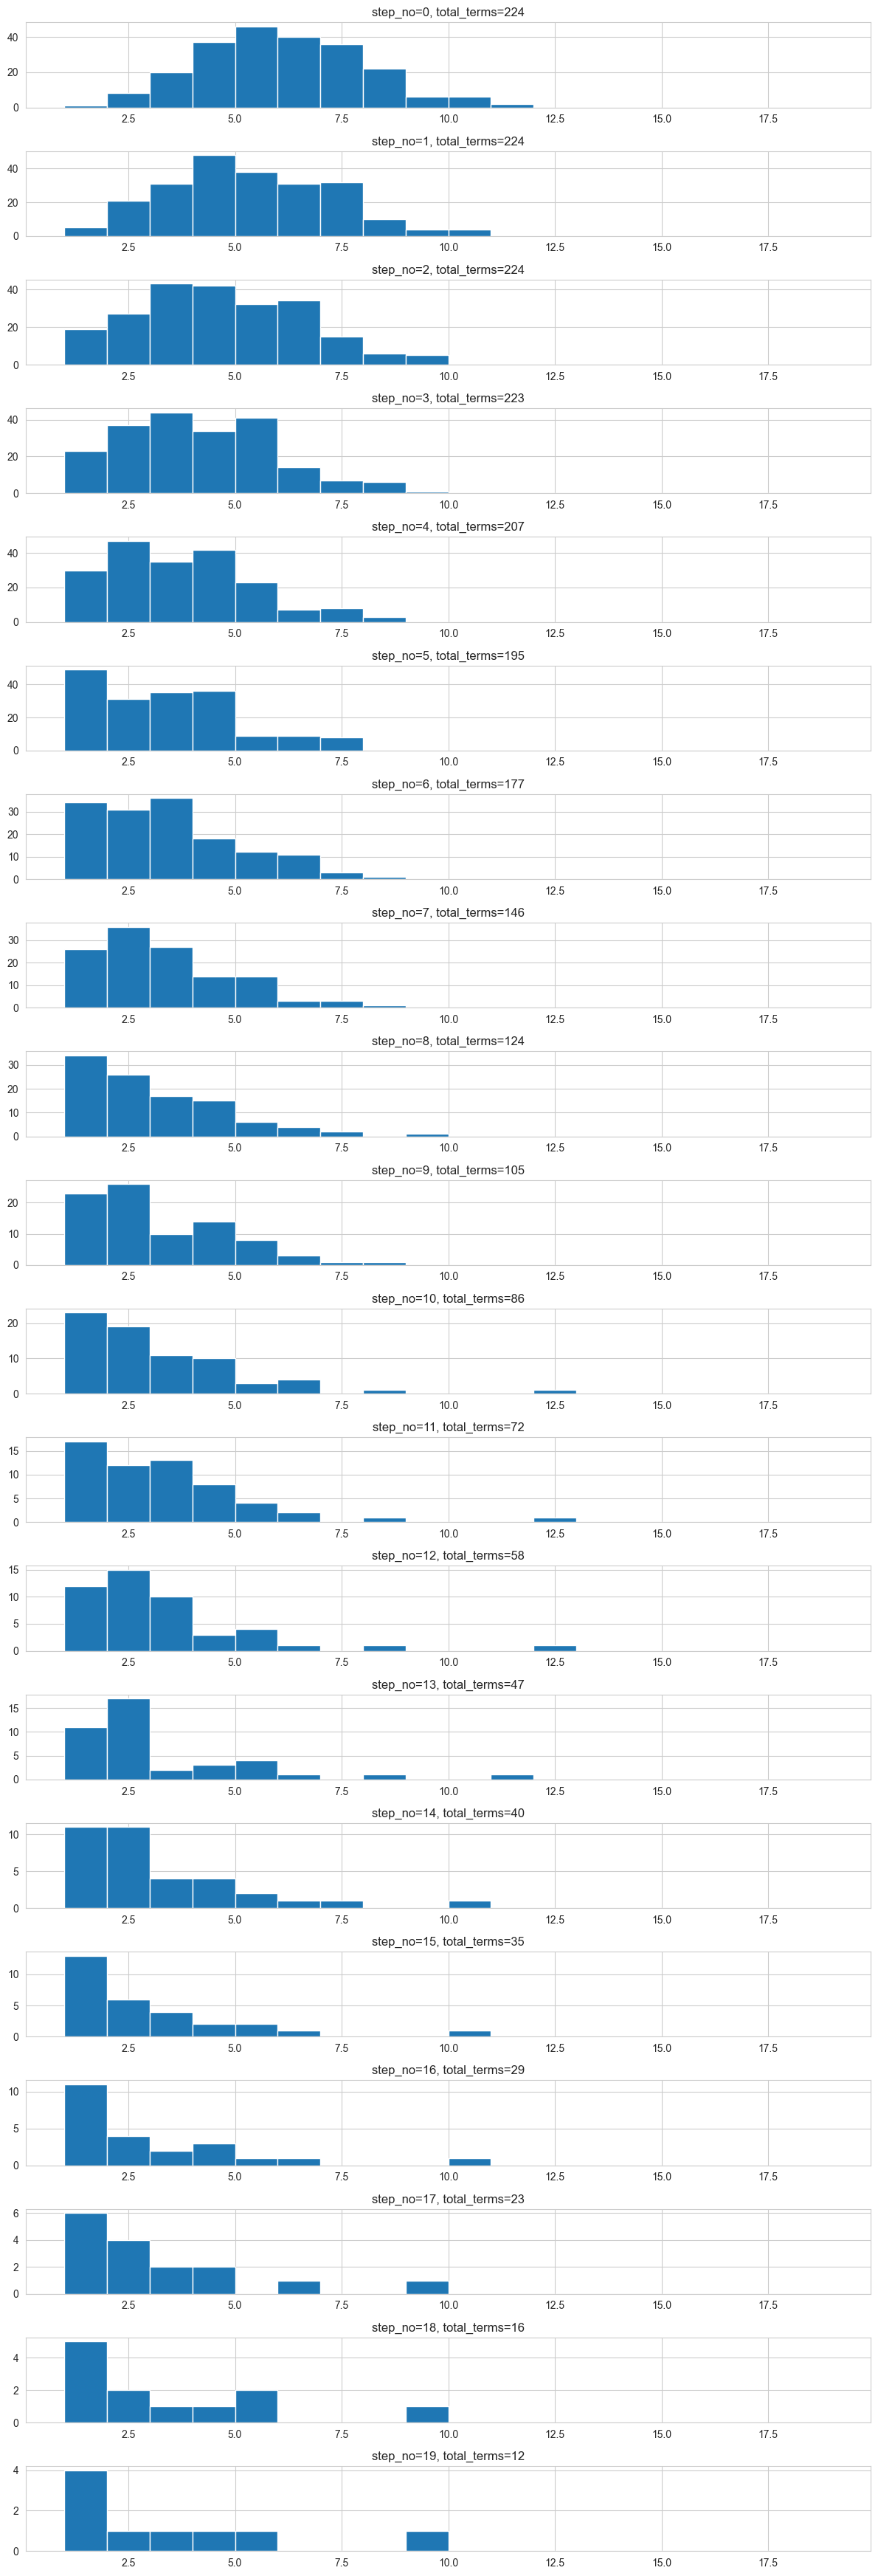

In [107]:
draw_hist_ridge_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="redexes", vis_data_lim=20,
)

LO norm for param: redex_depths


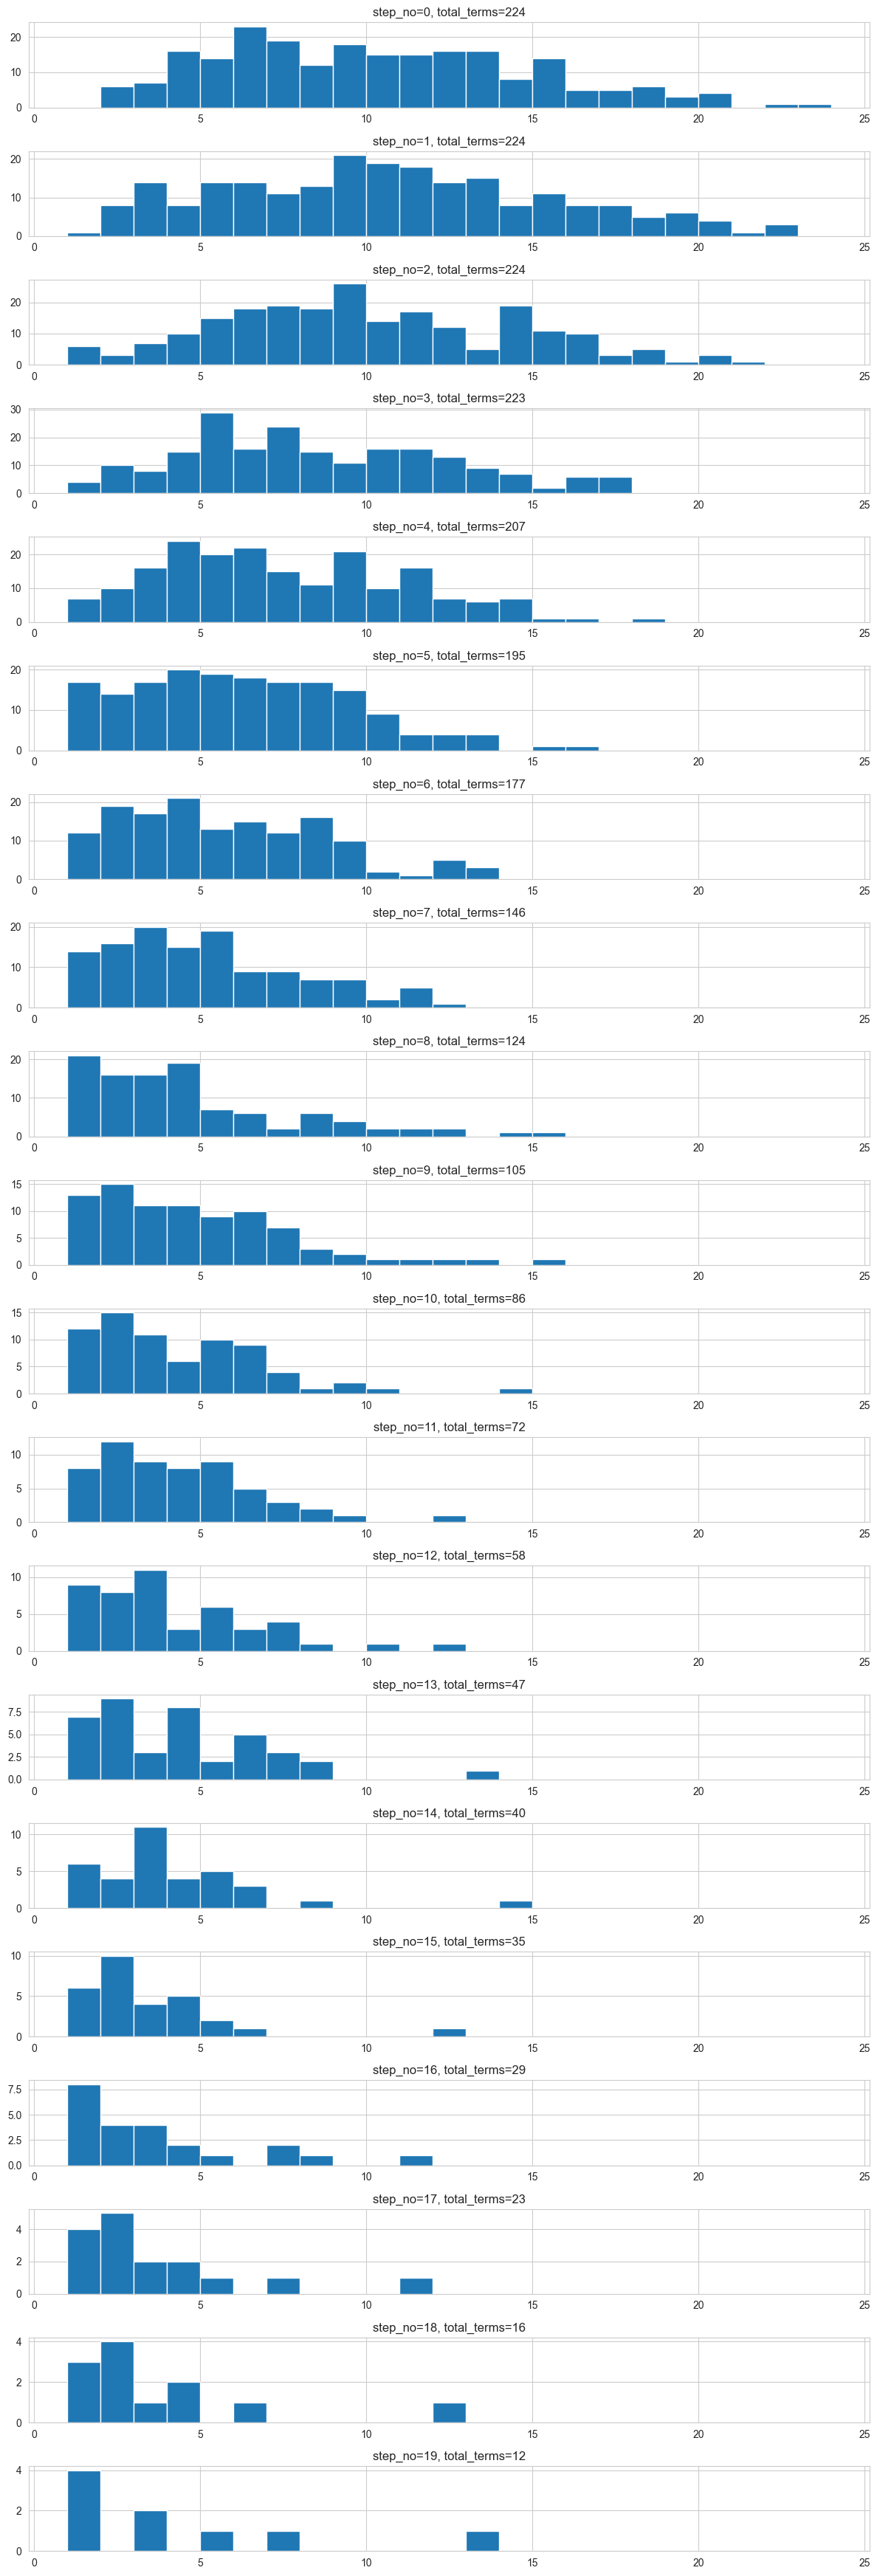

In [109]:
draw_hist_ridge_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="redex_depths", vis_data_lim=25,
)

LO norm for param: heights


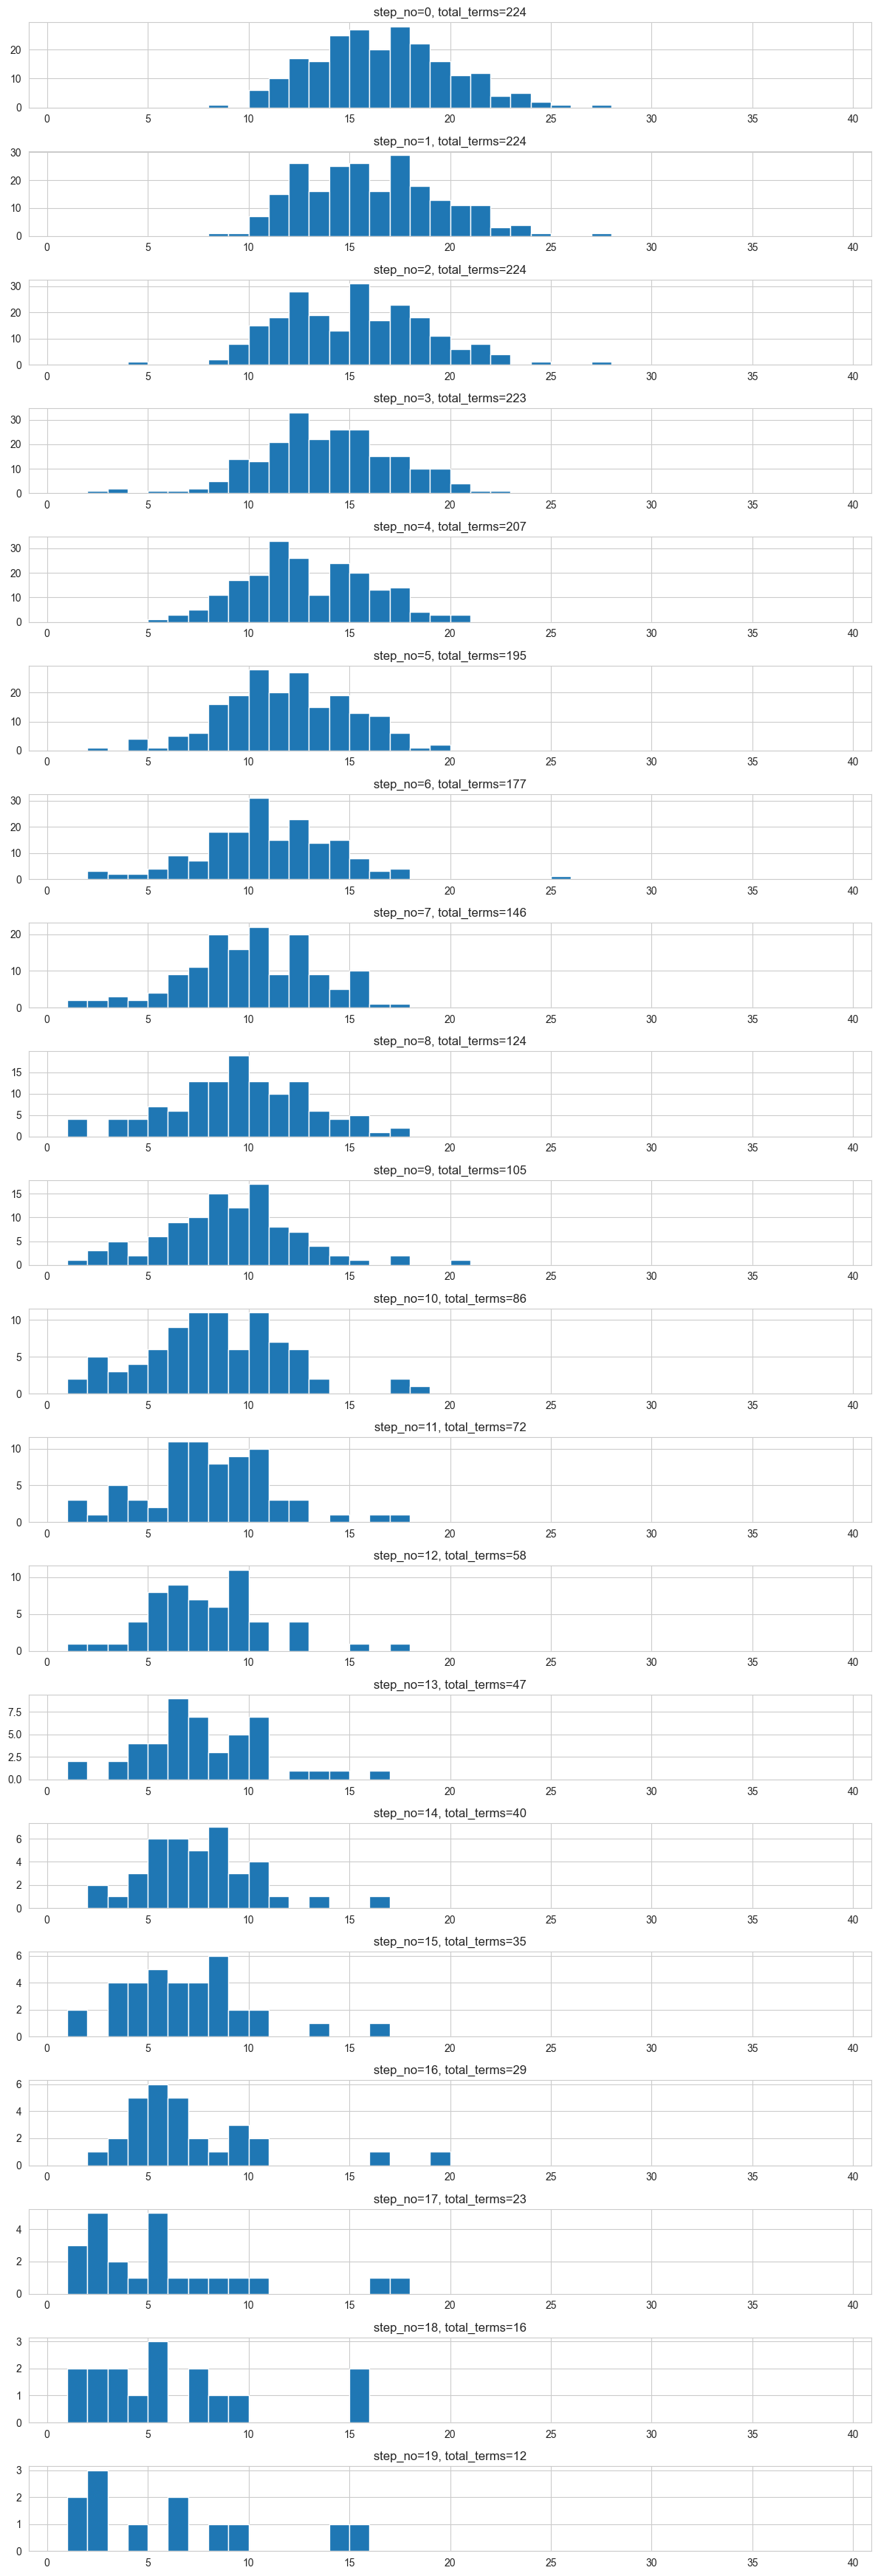

In [112]:
draw_hist_ridge_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="heights", vis_data_lim=40,
)

LO norm for param: widths


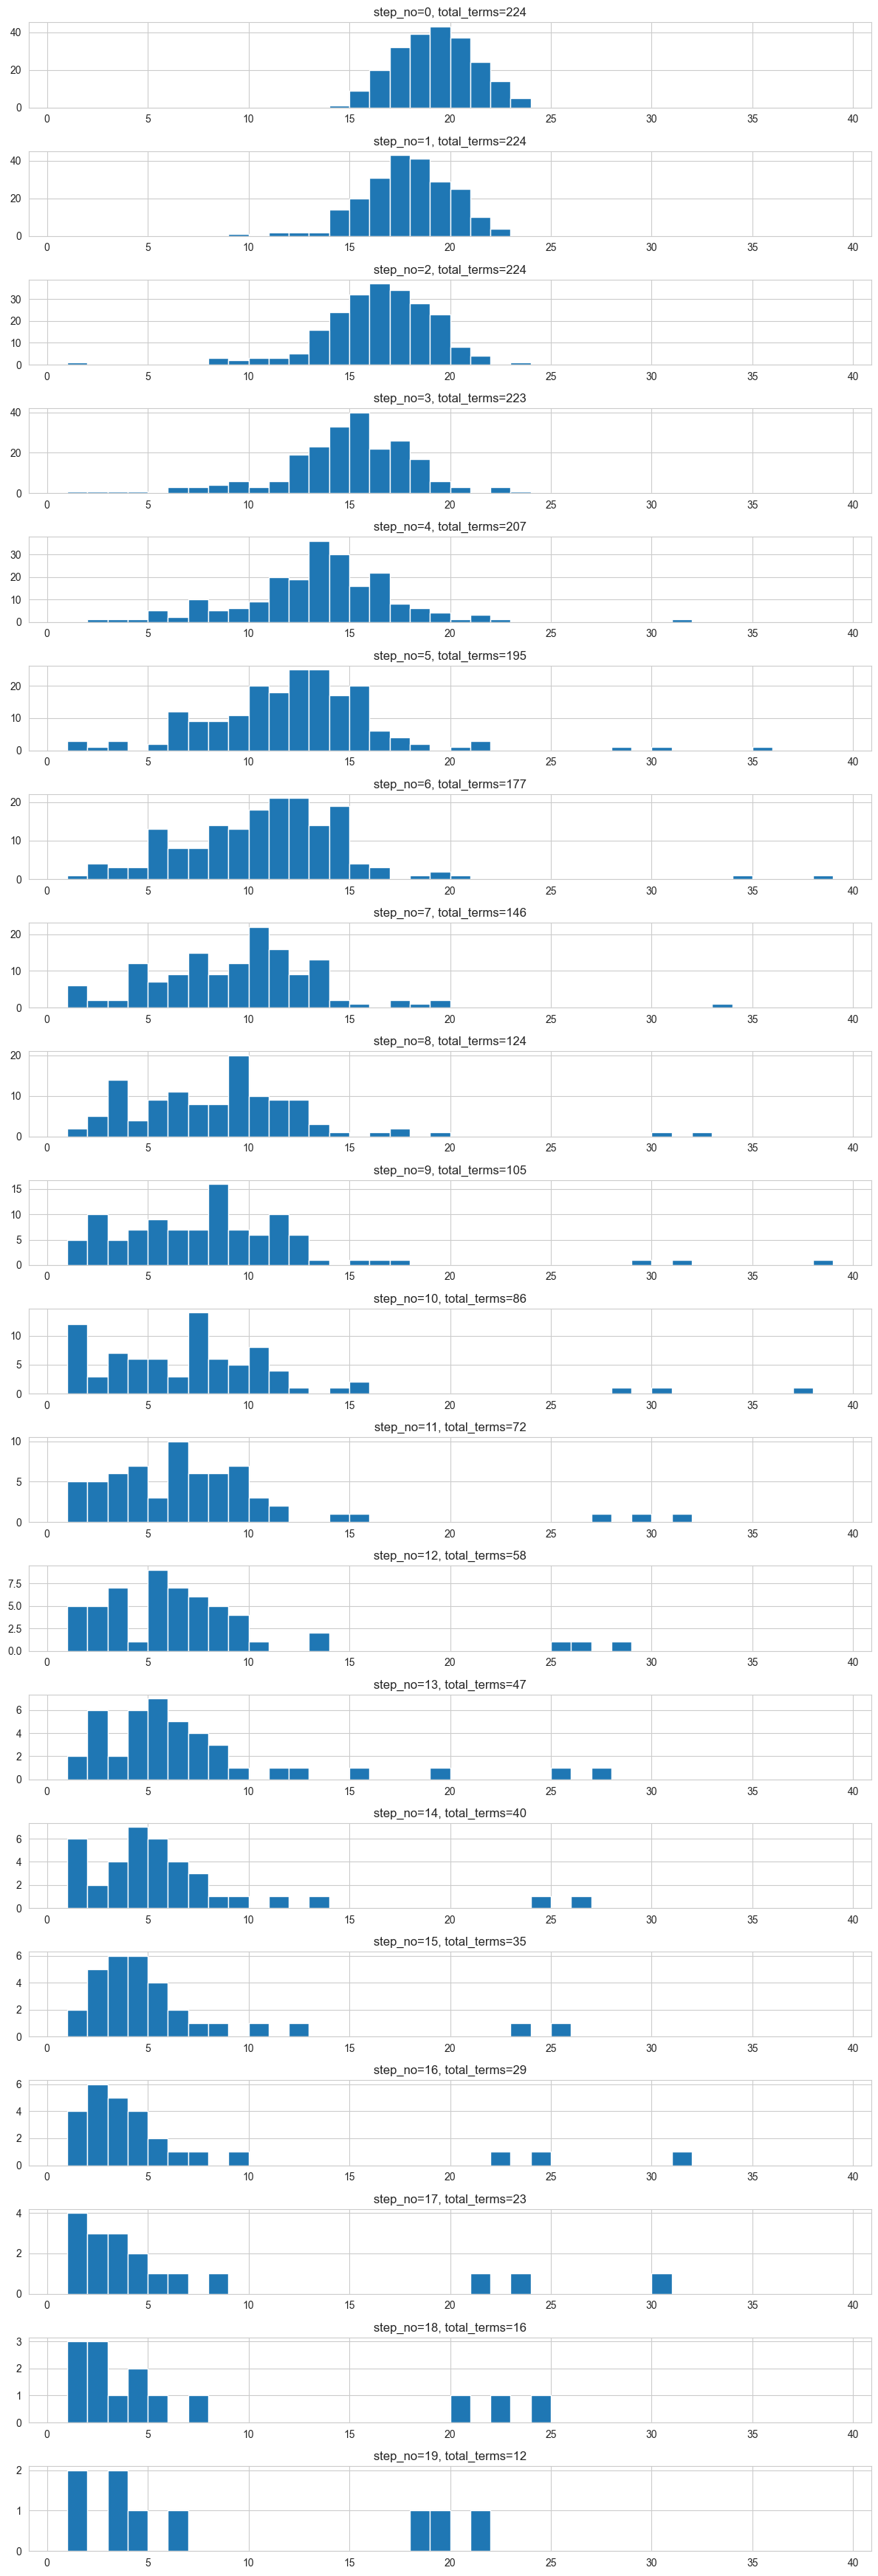

In [113]:
draw_hist_ridge_plot(
    data_vis=data_vis_LI, data_decr="LO norm",
    fist_step_no=0, last_step_no=20,
    vis_data_name="widths", vis_data_lim=40,
)

# Visualize both LO & LI

In [114]:
data_vis_comb_LI_LO = {
    "step": [], "step_count": [],
    "count_terms_LO": [], "vertices_LO": [], "redexes_LO": [], "redex_depths_LO": [],
    "redex_indexes_LO": [], "heights_LO": [], "widths_LO": [], "steps_time_LO": [],
    "count_terms_LI": [], "vertices_LI": [], "redexes_LI": [], "redex_depths_LI": [],
    "redex_indexes_LI": [], "heights_LI": [], "widths_LI": [], "steps_time_LI": []
}

params_lst = ["vertices", "redexes", "redex_depths", "redex_indexes", "heights", "widths", "steps_time"]
steps_lst = list(range(max(
    max([len(record["vertices"]) for record in data_LO if record]),
    max([len(record["vertices"]) for record in data_LI if record])
)))

global_inx = 0
for step_no in steps_lst:
    step_data_vis_LO = data_vis_LO[[step_no_ == step_no for step_no_ in data_vis_LO["step"]]].reset_index(drop=True).to_dict()
    step_data_vis_LI = data_vis_LI[[step_no_ == step_no for step_no_ in data_vis_LI["step"]]].reset_index(drop=True).to_dict()

    for inx in range(min(len(step_data_vis_LO["step"]), len(step_data_vis_LI["step"]))):
        data_vis_comb_LI_LO["step"].append(step_no)

        if inx < len(step_data_vis_LO["step"]):
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LO"].append(step_data_vis_LO[key_][inx])
            data_vis_comb_LI_LO["count_terms_LO"].append(step_data_vis_LO["count_terms"][inx])
        else:
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LO"].append(None)
            data_vis_comb_LI_LO["count_terms_LO"].append(data_vis_comb_LI_LO["count_terms_LO"][-1])

        if inx < len(step_data_vis_LI["step"]):
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LI"].append(step_data_vis_LI[key_][inx])
            data_vis_comb_LI_LO["count_terms_LI"].append(step_data_vis_LI["count_terms"][inx])
        else:
            for key_ in params_lst:
                data_vis_comb_LI_LO[key_ + "_LI"].append(None)
            data_vis_comb_LI_LO["count_terms_LI"].append(data_vis_comb_LI_LO["count_terms_LI"][-1])

        data_vis_comb_LI_LO["step_count"].append(
            f"{step_no} -> LO_[{data_vis_comb_LI_LO['count_terms_LO'][global_inx]}] LI_[{data_vis_comb_LI_LO['count_terms_LI'][global_inx]}]")
        global_inx += 1

data_vis_comb_LI_LO = pd.DataFrame(data_vis_comb_LI_LO)

In [115]:
data_vis_comb_LI_LO.head()

step              step_count  count_terms_LO  vertices_LO  redexes_LO  \
0     0  0 -> LO_[226] LI_[224]             226           53           3   
1     0  0 -> LO_[226] LI_[224]             226           54           6   
2     0  0 -> LO_[226] LI_[224]             226           56           6   
3     0  0 -> LO_[226] LI_[224]             226           51           2   
4     0  0 -> LO_[226] LI_[224]             226           51           5   

   redex_depths_LO  redex_indexes_LO  heights_LO  widths_LO  steps_time_LO  \
0                1                 1          15         21            0.0   
1                2                 2          13         17            0.0   
2                2                 2          18         22            0.0   
3                6                 6          14         19            0.0   
4                3                 3          11         17            0.0   

   count_terms_LI  vertices_LI  redexes_LI  redex_depths_LI  redex_indexes_LI  \
0             224           53           3                4                12   
1             224           54           6                7                10   
2             224           56           6                7                 7   
3             224           51           2                9                 9   
4             224           51           5                8                22   

   heights_LI  widths_LI  steps_time_LI  
0          15         21            0.0  
1          13         17            0.0  
2          18         22            0.0  
3          14         19            0.0  
4          11         17            0.0

In [123]:
def draw_hist_ridge_double_plot(
        data_vis, data_decr="LO norm",
        fist_step_no=0, last_step_no=20,
        vis_data_name_0="vertices_LO", vis_data_name_1="vertices_LI",
        vis_data_lim=100, range_step=1
):
    selected_data = [fist_step_no <= step_no < last_step_no for step_no in data_vis["step"]]
    tmp_data_vis = data_vis[selected_data].copy(deep=True)

    step_dict = dict()
    for key_ in range(fist_step_no, last_step_no):
        step_vis_data = tmp_data_vis[[step_no == key_ for step_no in tmp_data_vis["step"]]]
        count_terms_LO = step_vis_data["count_terms_LO"].to_list()[0]
        count_terms_LI = step_vis_data["count_terms_LI"].to_list()[1]

        step_dict[f"step_no={key_}, total_terms_L0={count_terms_LO}, total_terms_LI={count_terms_LI}"] = (
            step_vis_data[vis_data_name_0].to_list(),
            step_vis_data[vis_data_name_1].to_list(),
        )

    fig, axs = plt.subplots(len(step_dict.keys()), figsize=(12, 1.7 * len(step_dict.keys()) + 1))
    for i, key_ in enumerate(step_dict.keys()):
        axs[i].hist(step_dict[key_][0], range(1, vis_data_lim, range_step), label=vis_data_name_0, alpha=0.6,)
        axs[i].hist(step_dict[key_][1], range(1, vis_data_lim, range_step), label=vis_data_name_1, alpha=0.6,)
        axs[i].set_title(key_)

    print(f"{data_decr} for param: {vis_data_name_0} & {vis_data_name_1}")
    fig.tight_layout()

LO & LI norm for param: vertices_LO & vertices_LI


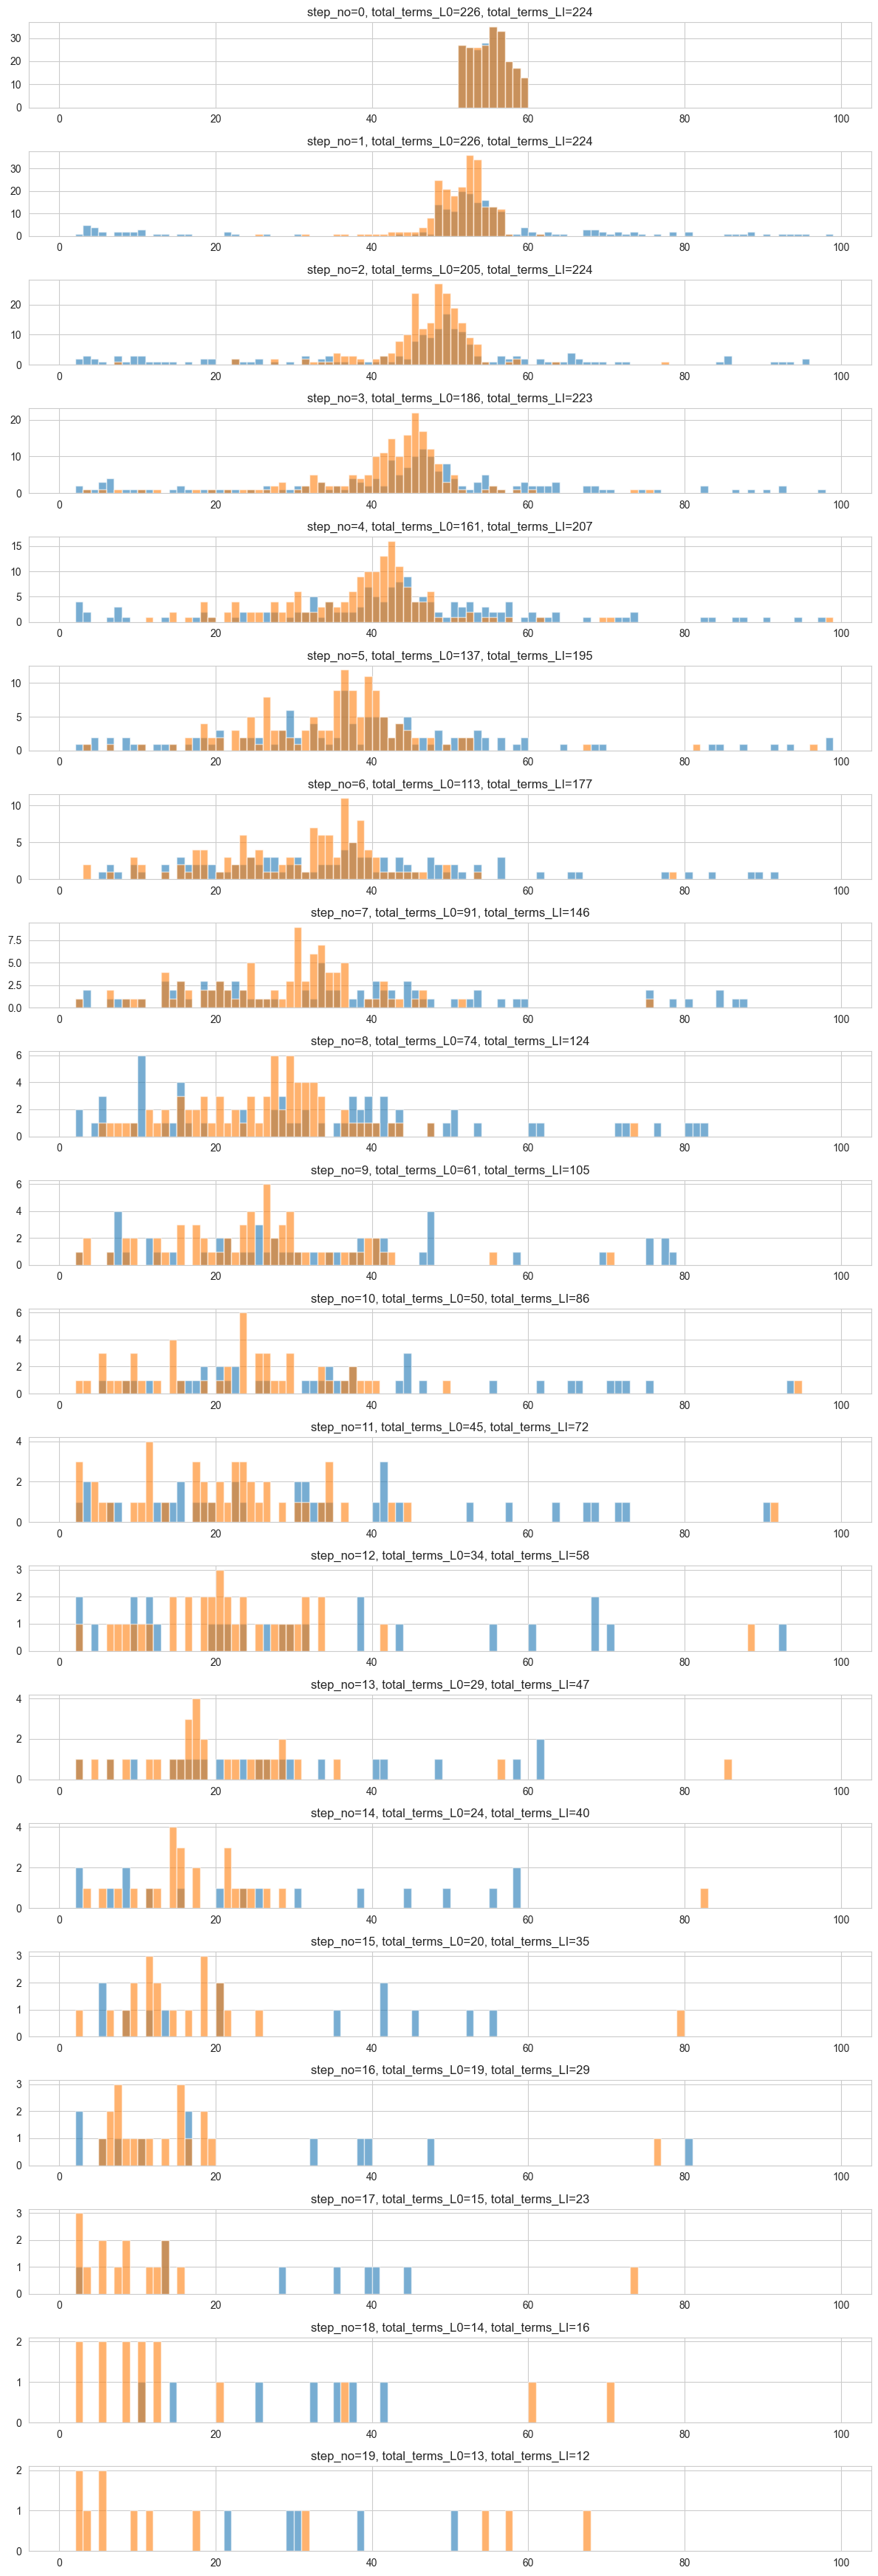

In [125]:
draw_hist_ridge_double_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO & LI norm",
    fist_step_no=0, last_step_no=20, vis_data_lim=100,
    vis_data_name_0="vertices_LO",
    vis_data_name_1="vertices_LI",
)

LO & LI norm for param: redexes_LO & redexes_LI


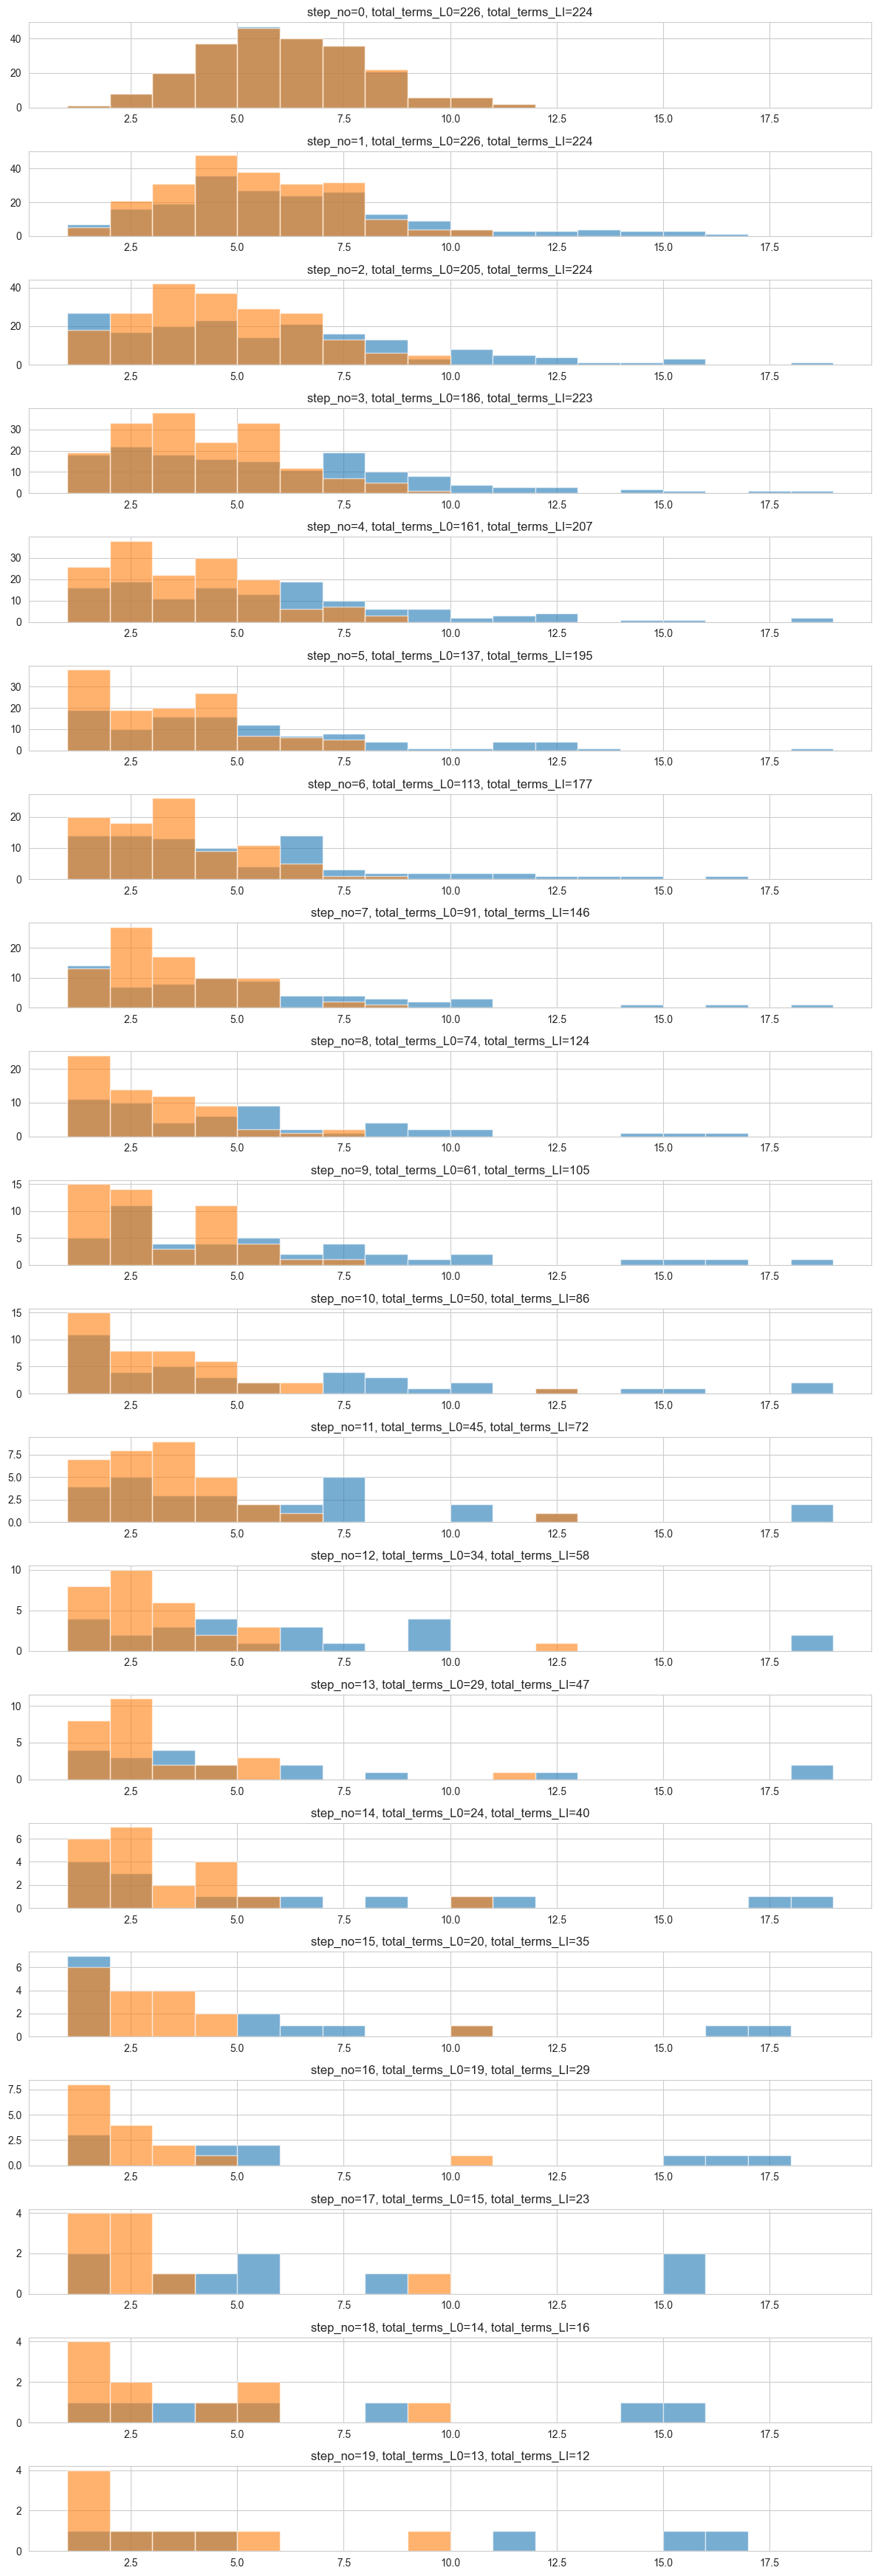

In [126]:
draw_hist_ridge_double_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO & LI norm",
    fist_step_no=0, last_step_no=20, vis_data_lim=20,
    vis_data_name_0="redexes_LO",
    vis_data_name_1="redexes_LI",
)

LO & LI norm for param: redex_depths_LO & redex_depths_LI


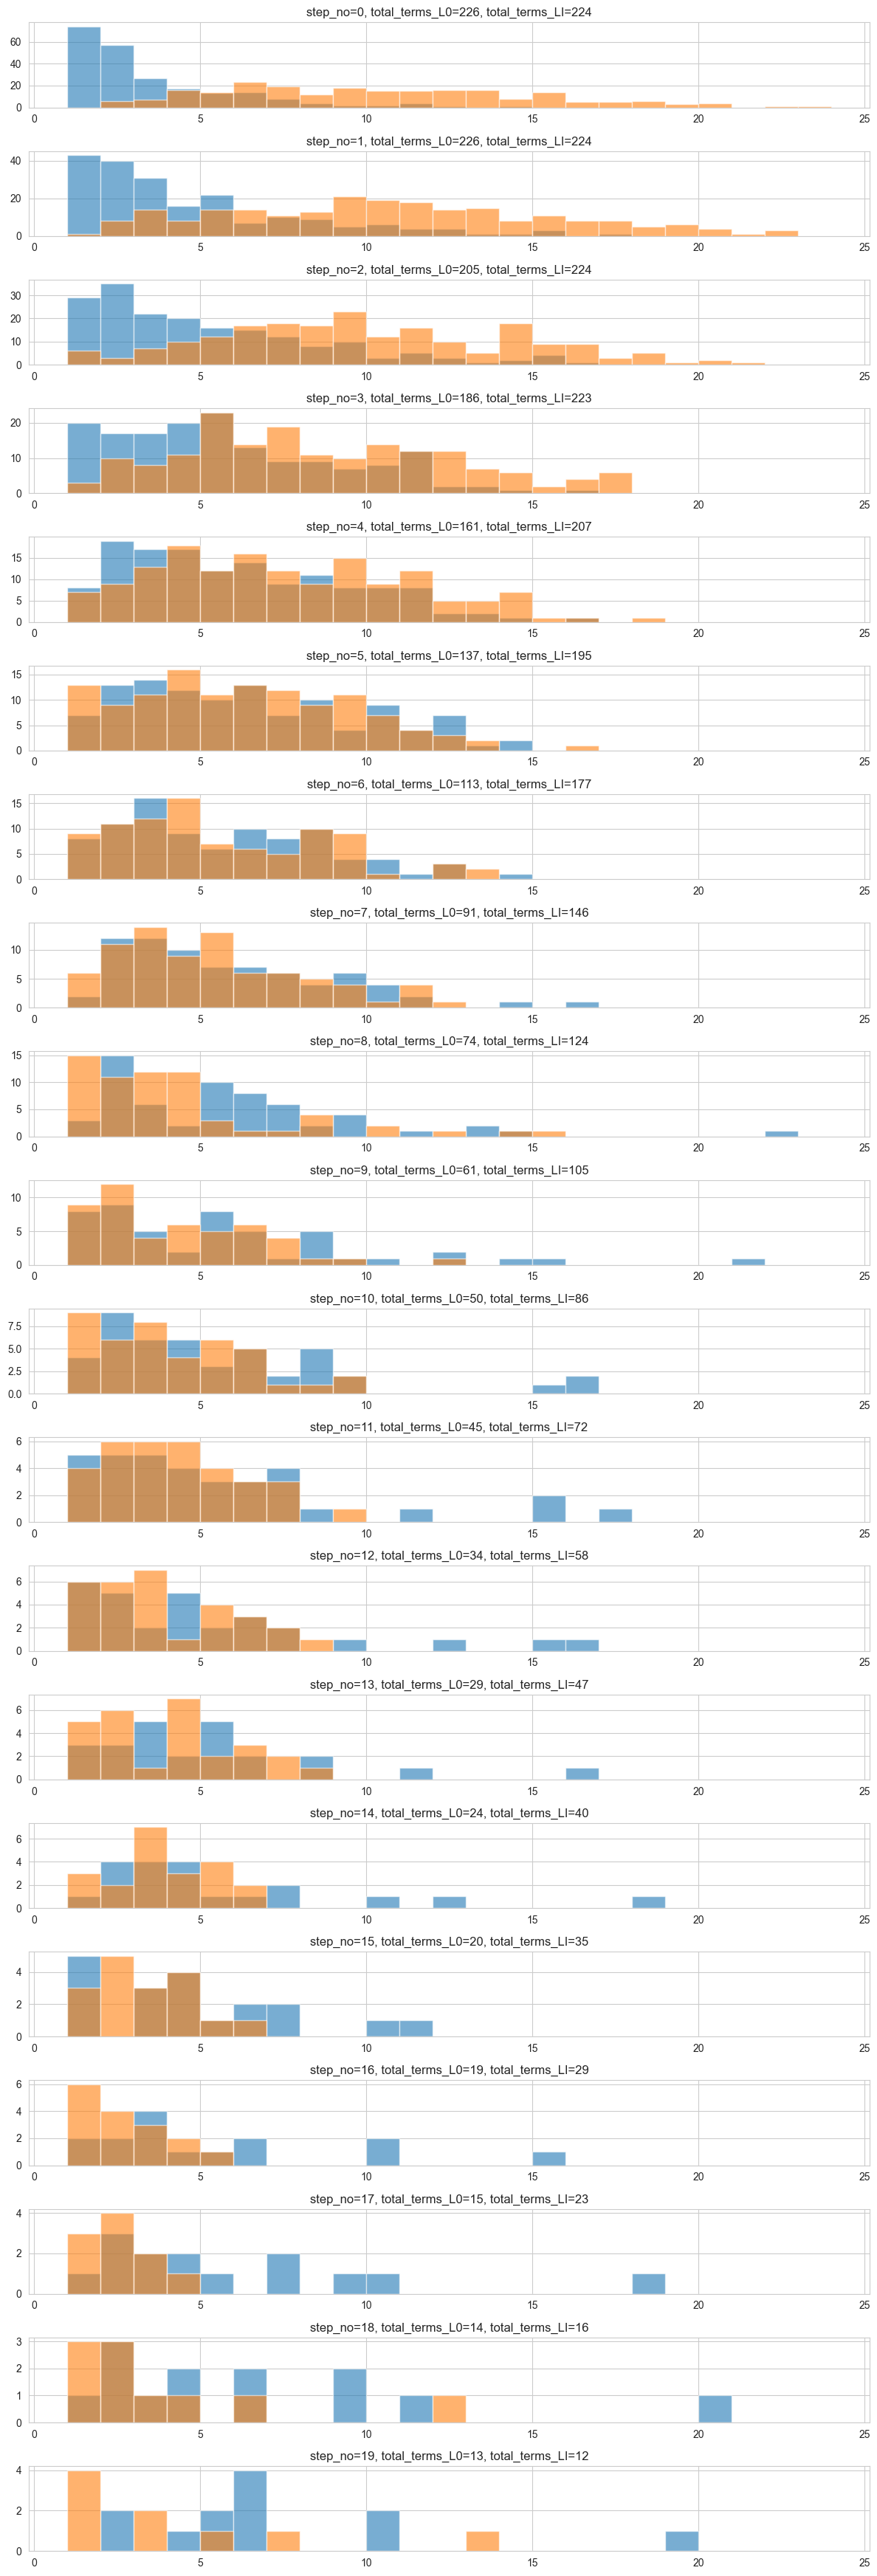

In [127]:
draw_hist_ridge_double_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO & LI norm",
    fist_step_no=0, last_step_no=20, vis_data_lim=25,
    vis_data_name_0="redex_depths_LO",
    vis_data_name_1="redex_depths_LI",
)

LO & LI norm for param: heights_LO & heights_LI


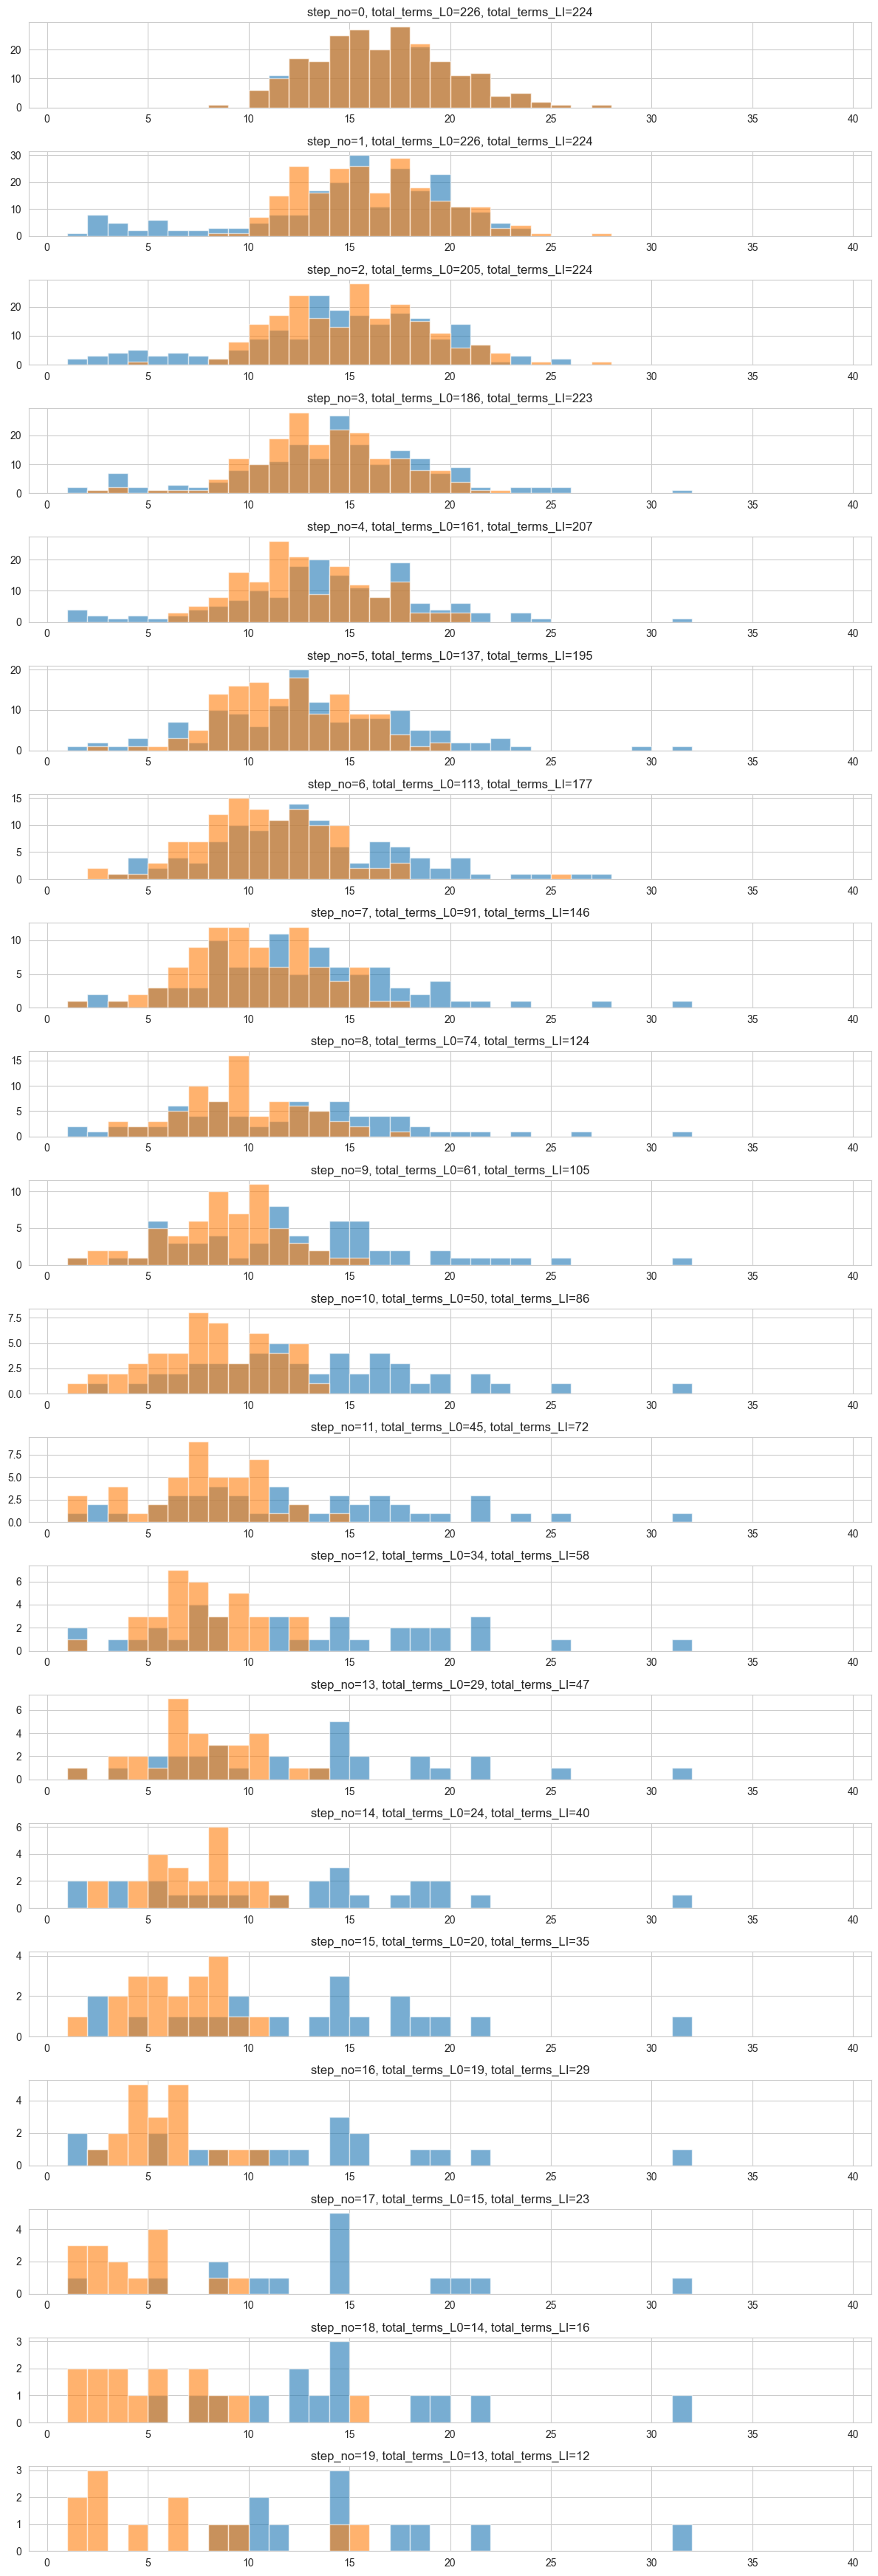

In [128]:
draw_hist_ridge_double_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO & LI norm",
    fist_step_no=0, last_step_no=20, vis_data_lim=40,
    vis_data_name_0="heights_LO",
    vis_data_name_1="heights_LI",
)

LO & LI norm for param: widths_LO & widths_LI


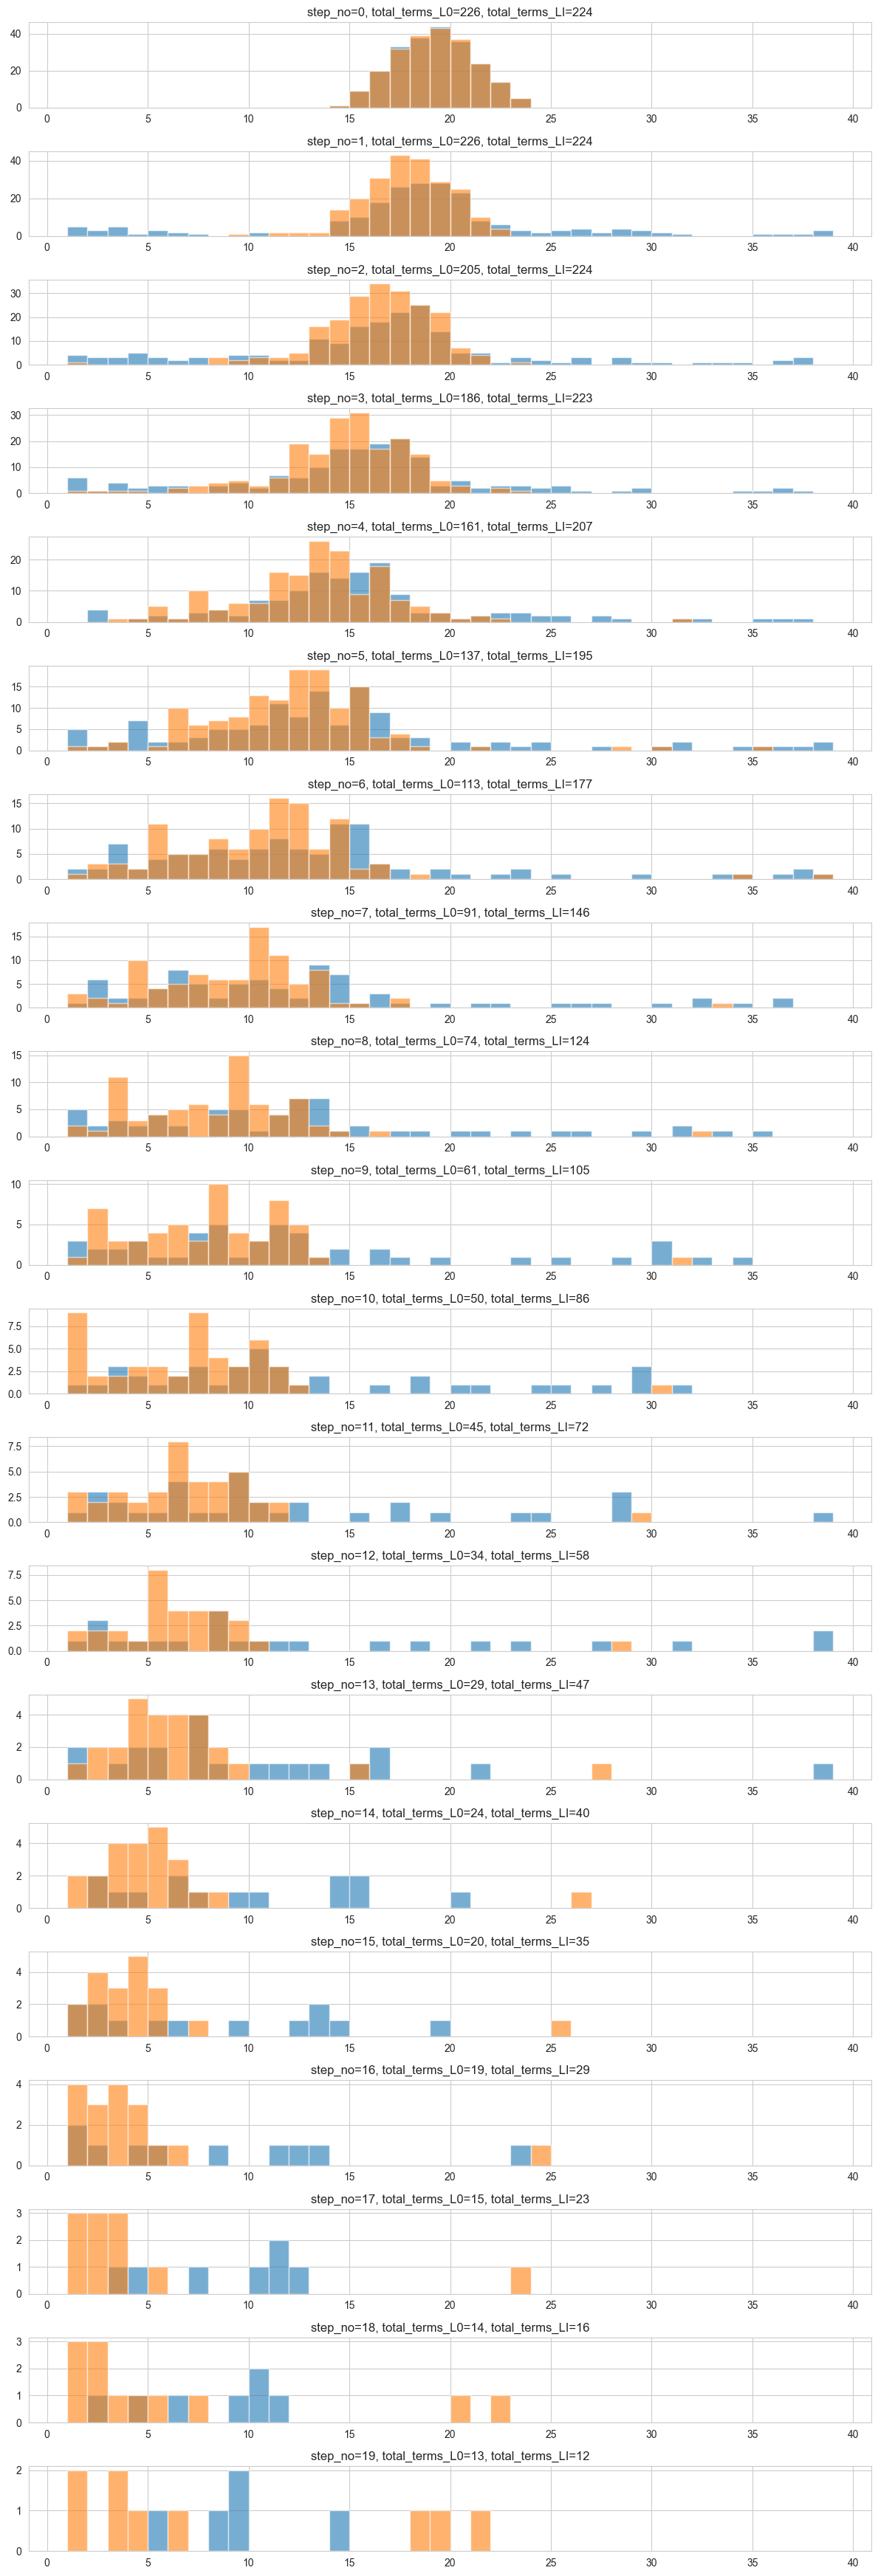

In [129]:
draw_hist_ridge_double_plot(
    data_vis=data_vis_comb_LI_LO, data_decr="LO & LI norm",
    fist_step_no=0, last_step_no=20, vis_data_lim=40,
    vis_data_name_0="widths_LO",
    vis_data_name_1="widths_LI",
)